In [1]:
# Project 2 - Shelter Animal Outcomes
# ===================================

# Submitted by: Dror Vered
# June 2018
# ========================

# The goal of this project is to predict the outcome of the dogs and the cats as they leave the Austin Animal Center.
# These outcomes include: Adoption, Died, Euthanasia, Return to owner, and Transfer.

# Part 1:
# Understand and analyze the problem, inquire the data, perform data visualization, provide insights and plan the next stages.

In [2]:
# My Work Plan:
# ==========

# 1. After reading the "train" file, I'll get familiar with the data and its features.
# 2. I'll perform some general analysis and visualization regarding OutcomeTypes.
# 3. For each given feature, I will:
#    - Look for empty and special values. 
#        - Are they important? (e.g. do empty pets' names relate somehow to OutcomeType?)
#        - should they be ignored/removed/updated?
#    - Explore and analyze the given features
#    As of now, it seems that there are features that are missing and could have been of use:
#        - Typical characteristics of the pet, such as: size, level of friendliness, ability to be train etc. 
#          Based on the pet's breed, I will try to obtain some data from external sources.
#        - Condition of pet upon arriving to shelter, level of training when entering the shelter (espcially with dogs),
#          and reason/circumstance of arrival to shelter. I guess this data will remain unknown.
# 4. Summary:
#    - Summary of the features added to the given data structure
#    - Summary of insights based on given and collected data
#    - Plans for the next part of the project

In [3]:
import pandas as pd
%matplotlib inline

In [4]:
# 1. Read the train file and get familiar with the data. Show unique values in each column

In [5]:
outcomes = pd.read_csv('train.csv', index_col='AnimalID', parse_dates=['DateTime'])
outcomes.head()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
AnimalID,,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [6]:
outcomes.describe()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,6374,22918,5,16,2,5,44,1380,366
top,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,136,19,10769,7816,15595,9779,3969,8810,2824
first,NaN,2013-10-01 09:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2016-02-21 19:17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
animal_types = outcomes.groupby('AnimalType')['DateTime'].count()
animal_types

AnimalType
Cat    11134
Dog    15595
Name: DateTime, dtype: int64

In [8]:
# 2. Perform some general analysis and visualization regarding OutcomeTypes

In [9]:
type_value_counts = outcomes.OutcomeType.value_counts()

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64


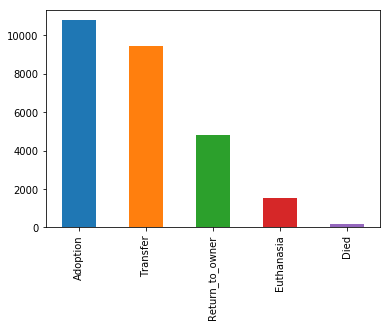

In [10]:
print(type_value_counts)
type_value_counts.plot(kind='bar')

In [11]:
outcomes.OutcomeType.value_counts(normalize=True)

Adoption           0.402896
Transfer           0.352501
Return_to_owner    0.179056
Euthanasia         0.058177
Died               0.007370
Name: OutcomeType, dtype: float64

In [12]:
# Insight:
# According to the description of the case in the Kaggle web page, the outcome of more than 35% of pets arriving to shelters
# in the US every year is death (2.7 milion out of 7.6 million). However, strangely enough, according to the dataset of intake
# information received from the AAC (Austin Animal Center), the percent of dead and euthanized dogs and cats (along 2.5 years)
# is only 6.5% (5.8% Euthanasia + 0.7% Died ,752 out of 26,729 ).

# Trying to explain the above finding, I'd like to suggest that the "final outcome" of many transferred pets might be
# "not as good as expected".

In [13]:
outcomes.groupby(['AnimalType', 'OutcomeType'])['Name'].count()

AnimalType  OutcomeType    
Cat         Adoption           3626
            Died                 55
            Euthanasia          156
            Return_to_owner     456
            Transfer           1822
Dog         Adoption           5465
            Died                 22
            Euthanasia          584
            Return_to_owner    4177
            Transfer           2675
Name: Name, dtype: int64

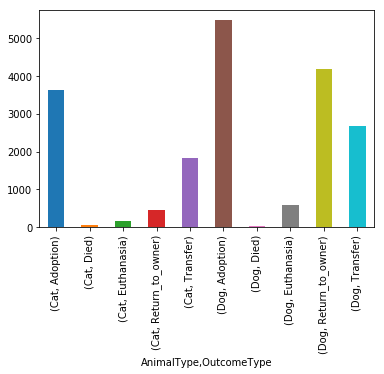

In [14]:
outcomes.groupby(['AnimalType', 'OutcomeType'])['Name'].count().plot(kind='bar')

In [15]:
# 3. For each given feature:
#    a. Looking for empty and special values. 
#    b. Exploring and analyzing the given features

In [16]:
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26729 entries, A671945 to A706629
Data columns (total 9 columns):
Name              19038 non-null object
DateTime          26729 non-null datetime64[ns]
OutcomeType       26729 non-null object
OutcomeSubtype    13117 non-null object
AnimalType        26729 non-null object
SexuponOutcome    26728 non-null object
AgeuponOutcome    26711 non-null object
Breed             26729 non-null object
Color             26729 non-null object
dtypes: datetime64[ns](1), object(8)
memory usage: 2.0+ MB


In [17]:
# The following features have empty values:
# - Name: there are 26,729-19,038=7,691 pets with no name. I assume these animals were picked-up from the street, or maybe
#         they were born in the shelter and were not given a name.
#         I will later inquire whether there is a correlation between the outcome of the pet and the fact that its name is
#         uknown.
# - OutcomeSubtype: there are 26,729-13,117=13,612 empty values. However, most of these might be a matter of little importance.
#                   I will explore on that as follows.
# - SexuponOutcome: there is only 1 empty value (negligible)
# - AgeuponOutcome: there are 26,729-26,711=18 empty values. Although this is an important feature, the amount of these null
#                   values is negligible.

In [18]:
# 3.1 Name:
# =========

In [19]:
# 3.1.a looking for "special" names (such as "unknown" or "John Doe")
# -------------------------------------------------------------------

In [20]:
print(outcomes.Name.nunique())
outcomes.Name.value_counts(normalize=True).head(10)

6374


Max         0.007144
Bella       0.007091
Charlie     0.005620
Daisy       0.005568
Lucy        0.004937
Buddy       0.004570
Princess    0.004517
Rocky       0.004465
Luna        0.003572
Jack        0.003467
Name: Name, dtype: float64

In [21]:
# It seems that there's no significant group of pets that has a "special name"

In [22]:
print(len(outcomes[outcomes.Name=='Unknown']))
print(len(outcomes[outcomes.Name=='John Doe']))

0
0


In [23]:
# It seems that there are no special names such as the above

In [24]:
# I will now convert empty names to "Unknown", for later use.

outcomes.Name.fillna(value='Unknown', inplace=True)

In [25]:
outcomes.Name.value_counts().head()

Unknown    7691
Max         136
Bella       135
Charlie     107
Daisy       106
Name: Name, dtype: int64

In [26]:
# 3.1.b Exploring and analyzing the Name feature
# ----------------------------------------------

# Do 'Unknown' pets' names relate somehow to OutcomeType?
# To explore this question, I'll now add two columns called 'Named' and 'UnNamed'

outcomes['Named'] = outcomes.Name.apply(lambda name: 0 if name == 'Unknown' else 1)
outcomes['UnNamed'] = outcomes.Name.apply(lambda name: 1 if name == 'Unknown' else 0)
outcomes.head()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Named,UnNamed
AnimalID,,,,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,1,0
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1,0
A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,1,0
A683430,Unknown,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,0,1
A667013,Unknown,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,0,1


In [27]:
outcomes_grpby_named = outcomes.groupby('OutcomeType')['Named', 'UnNamed'].sum()
outcomes_grpby_named

,Named,UnNamed
OutcomeType,,
Adoption,9091,1678
Died,77,120
Euthanasia,740,815
Return_to_owner,4633,153
Transfer,4497,4925


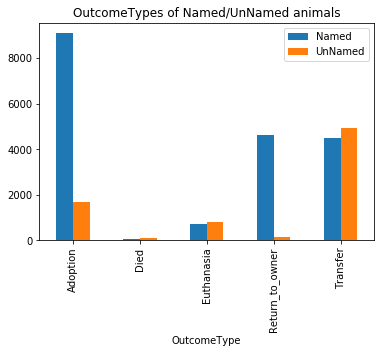

In [28]:
# visualization - bar chart:

outcomes_grpby_named.plot(kind='bar', title='OutcomeTypes of Named/UnNamed animals')

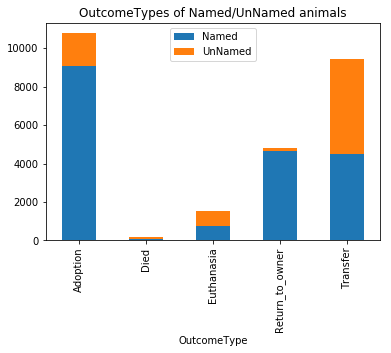

In [29]:
# another way to show it - stacked bar:

outcomes_grpby_named.plot(kind='bar', stacked=True, title='OutcomeTypes of Named/UnNamed animals')

In [30]:
# normalize over each row

pd.crosstab(outcomes.OutcomeType, outcomes.Named, margins=True, normalize='index')

Named,0,1
OutcomeType,,
Adoption,0.155818,0.844182
Died,0.609137,0.390863
Euthanasia,0.524116,0.475884
Return_to_owner,0.031968,0.968032
Transfer,0.522713,0.477287
All,0.287740,0.712260


In [31]:
# normalize over each column

pd.crosstab(outcomes.OutcomeType, outcomes.Named, margins=True, normalize='columns')

Named,0,1,All
OutcomeType,,,
Adoption,0.218177,0.477519,0.402896
Died,0.015603,0.004045,0.007370
Euthanasia,0.105968,0.038870,0.058177
Return_to_owner,0.019893,0.243355,0.179056
Transfer,0.640359,0.236212,0.352501


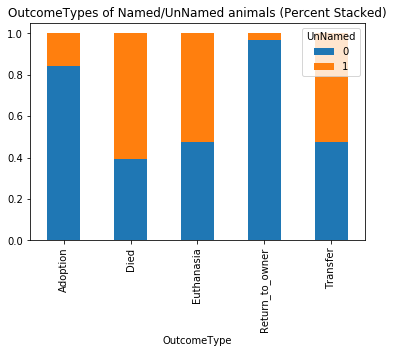

In [32]:
# visualization - percent stacked bar:

type_unnamed_crstb = pd.crosstab(outcomes.OutcomeType, outcomes.UnNamed)
type_unnamed_crstb = type_unnamed_crstb.div(type_unnamed_crstb.sum(1), axis=0)
type_unnamed_crstb.plot(kind='bar', stacked=True, title='OutcomeTypes of Named/UnNamed animals (Percent Stacked)')


In [33]:
# Insights:
# - Almost 85% of adopted animals, are named
# - Almost 97% of animals which are Returned To their Owners (RTO), are named
# - Almost 70% of died animals, are un-named
# - un-named animals tend to be euthanised and transferred more than named animals
# - 47% of named animals are adopted, weheras the rate of total adoptions is only 40%
# - 24% of named animals are RTO, weheras the rate of total RTO is only 18%
# - Likewize, the percentages of named animals which are Died/Euthanaised/Transferred are lower than total percentages

In [34]:
# 3.2 DateTime:
# =============

In [35]:
# 3.2.a Empty/special values:
# ---------------------------
# As shown above, there are no empty values in this column, and all dates are in the same format (yyyy/dd/mm hh:mm:ss)

In [36]:
# 3.2.b Exploring and analyzing the DateTime feature
# --------------------------------------------------

# Although the header of the column doesn't say "OutcomeDateTime", as in the case of all other "outcome" features, by looking
# at the order of the DateTimes values, it is noticeable that they are not sorted like the AnimalIDs (which are given during
# the intakes). That indicates that the DateTime values are not the entrances dates, but the outcomes dates.
# As such, it seems that this feature will not be of use when trying to predict the next outcome. However it might suggests
# that the shelter may put some extra effort during certain periods of times during the year (weekends? holidays?...)

# What I'm going to look for, is whether the 'volume of activity' is somehow related to: 
# i.   specific day(s) of the week
# ii.  specific season(s)/month(s)
# iii. holidays

In [37]:
# i. specific day(s) of the week

# To explore this issue, I'll add the column 'DayOfWeek', as follows:

outcomes['DayOfWeek'] = outcomes['DateTime'].dt.weekday_name

In [38]:
from pandas.api.types import CategoricalDtype
days_values = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
days_cat_type = CategoricalDtype(categories=days_values, ordered=True)

outcomes['DayOfWeek'] = outcomes['DayOfWeek'].astype(days_cat_type)

In [39]:
outcomes.head()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Named,UnNamed,DayOfWeek
AnimalID,,,,,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,1,0,Wednesday
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1,0,Sunday
A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,1,0,Saturday
A683430,Unknown,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,0,1,Friday
A667013,Unknown,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,0,1,Friday


In [40]:
OutcomeType_DOW_crstb = pd.crosstab(outcomes.OutcomeType, outcomes.DayOfWeek.sort_values(), margins=True, normalize='index')

DayOfWeek          Sunday    Monday   Tuesday  Wednesday  Thursday    Friday  \
OutcomeType                                                                    
Adoption         0.205869  0.125638  0.123503   0.110874  0.103909  0.115888   
Died             0.162437  0.137056  0.162437   0.131980  0.101523  0.157360   
Euthanasia       0.111254  0.165273  0.158199   0.148553  0.160772  0.151125   
Return_to_owner  0.145842  0.150857  0.153782   0.143962  0.133932  0.135395   
Transfer         0.127043  0.141902  0.164721   0.145404  0.142857  0.151136   
All              0.161510  0.138277  0.145759   0.131318  0.126305  0.134161   

DayOfWeek        Saturday  
OutcomeType                
Adoption         0.214319  
Died             0.147208  
Euthanasia       0.104823  
Return_to_owner  0.136231  
Transfer         0.126937  
All              0.162670  


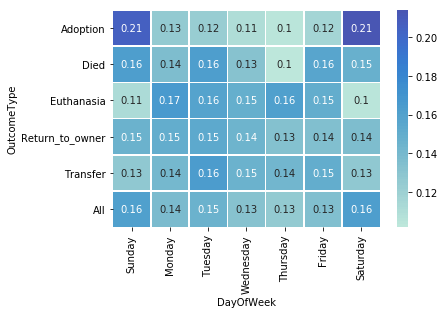

In [41]:
import seaborn as sns
print(OutcomeType_DOW_crstb)
sns.heatmap(OutcomeType_DOW_crstb, linewidths=0.5, annot=True, center=0.3)

In [42]:
# Insight:
# - Not surprisingly, it seems that most adoptions take place during the weekends. Also, it seems that animals are euthanaised
#   mostly on Mondays, supposedly after they had not been adopted during the passed weekend.
# - As I mentioned above, this feature will not contribute for predicting the next outcome, however it might suggests that the
#   shelter may put some extra effort during weekends, as people tend to adopt the animals on Sat and Sun.

In [43]:
# ii. seasons

# To make it simple, I'll use the attribute 'quarter' (1 = Jan to Mar, 2 = Apr to Jun, etc.)
# I'll add the column 'Quarter' as follows:

outcomes['Quarter'] = outcomes['DateTime'].dt.quarter

In [44]:
outcomes.head()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Named,UnNamed,DayOfWeek,Quarter
AnimalID,,,,,,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,1,0,Wednesday,1
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1,0,Sunday,4
A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,1,0,Saturday,1
A683430,Unknown,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,0,1,Friday,3
A667013,Unknown,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,0,1,Friday,4


In [45]:
type_Q_crstb = pd.crosstab(outcomes.OutcomeType, outcomes.Quarter, margins=True, normalize='index')

Quarter                 1         2         3         4
OutcomeType                                            
Adoption         0.226112  0.187204  0.267991  0.318693
Died             0.167513  0.263959  0.294416  0.274112
Euthanasia       0.214791  0.252090  0.232797  0.300322
Return_to_owner  0.262223  0.225240  0.193272  0.319265
Transfer         0.174910  0.272129  0.260136  0.292825
All              0.213439  0.228291  0.249991  0.308279


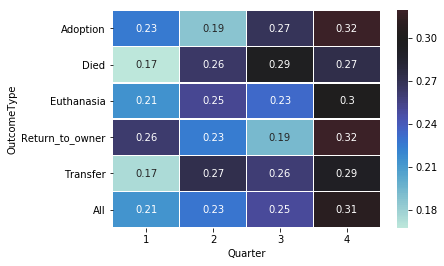

In [46]:
import seaborn as sns
print(type_Q_crstb)
sns.heatmap(type_Q_crstb, linewidths=0.5, annot=True, center=0.3)

In [47]:
# Insight: it seems that more activites take place during Q4, and less during Q1.

In [48]:
# iii. holidays

# I'll try to explre whether people tend to adopt animals as a present for the holidays. It will probably not help predict
# the outcome of the next dog, but it might indicate that the shelter sould put some extra effort before holidays.
# I built a csv file with most of the holidays that took place during the relevant period (Oct-13 to Mar-16).

In [49]:
holidays = pd.read_csv('austin holidays.csv', sep=',', parse_dates=['HolidayDate'], encoding='latin-1')

In [50]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
HolidayName    71 non-null object
HolidayDate    71 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 1.2+ KB


In [51]:
holidays.head()

,HolidayName,HolidayDate
0,Rosh Hashanah,2013-05-09
1,Columbus Day,2013-10-14
2,Halloween,2013-10-31
3,Veterans Day,2013-11-11
4,Thanksgiving Day,2013-11-28


In [52]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
HolidayName    71 non-null object
HolidayDate    71 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 1.2+ KB


In [53]:
def before_holiday(date_time):
    '''
    Finds out whether a given date falls 5 days or less before a holiday (an adoption that took place up to 5 days before
    the holiday, is considered here as a "holiday gift").
    If yes, returns the holiday's name, otherwise None.
    '''
    i = 0
    for holiday_date in holidays.HolidayDate:
        dates_diff = holiday_date - date_time
        if dates_diff.days > 5:  
            return 'No Holiday' 
        if dates_diff.days >= 0:
            return holidays.iloc[i,0]
        i += 1
    return 'No Holiday'

outcomes['Holiday'] = outcomes['DateTime'].apply(before_holiday)

In [54]:
print(outcomes[outcomes.OutcomeType == 'Adoption'].DateTime.count())
outcomes[outcomes.OutcomeType == 'Adoption'].Holiday.value_counts(dropna=False)

10769


No Holiday                    8582
Christmas                      306
New Years Day                  263
Columbus Day                   177
Thanksgiving Day               146
Confederate Heroes Day         144
Veterans Day                   130
Easter                         130
Cesar Chavez Day               118
Mothers Day                    114
St. Patricks Day               108
Valentines Day                  98
Martin Luther King Jr. Day      95
Chinese New Year                83
Chanukah                        67
Passover                        66
Presidents Day                  65
Halloween                       59
San Jacinto Day                 15
Black Friday                     3
Name: Holiday, dtype: int64

In [55]:
outcomes[outcomes.OutcomeType == 'Adoption'].Holiday.value_counts(dropna=False, normalize=True).head()

No Holiday          0.796917
Christmas           0.028415
New Years Day       0.024422
Columbus Day        0.016436
Thanksgiving Day    0.013557
Name: Holiday, dtype: float64

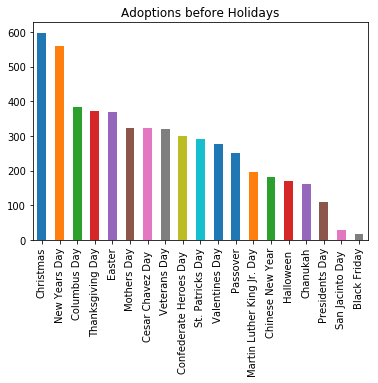

In [56]:
outcomes[outcomes.Holiday != 'No Holiday'].Holiday.value_counts().plot(kind='bar', title='Adoptions before Holidays')

In [57]:
# Insight: about 20% of all adoptions take place 5 days or less before a holiday (mostly before Christmas)

In [58]:
# 3.3 OutcomeSubtype:
# ===================

In [59]:
# As of now, it is not clear whether this feature is important for us, or not. I will now explore this feature.
# As shown above, there are a lot of empty values in this column. However, this is not much of a problem.

In [60]:
# 3b. OutcomeSubtype: any "special" values?

subtype_type_crosstab = pd.crosstab(outcomes.OutcomeSubtype, outcomes.OutcomeType, dropna=False)
subtype_type_crosstab

OutcomeType,Adoption,Died,Euthanasia,Return_to_owner,Transfer
OutcomeSubtype,,,,,
Aggressive,0,0,320,0,0
At Vet,0,4,0,0,0
Barn,1,0,0,0,1
Behavior,0,0,86,0,0
Court/Investigation,0,0,6,0,0
Enroute,0,8,0,0,0
Foster,1800,0,0,0,0
In Foster,0,52,0,0,0
In Kennel,0,114,0,0,0


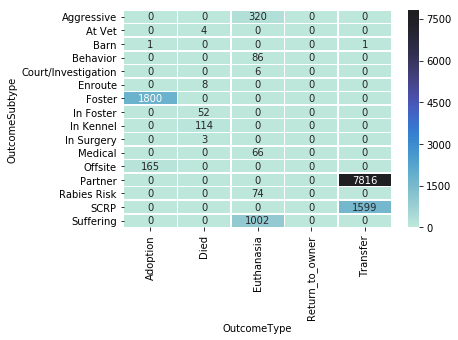

In [61]:
sns.heatmap(subtype_type_crosstab, linewidths=0.5, annot=True, fmt="d", center=8000)

In [62]:
# Insights:
# - It seems that if an animal is suffering, aggressive, bad-behaving, in Rabies Risk or has a medical problem - it will be
#   euthanaized.
# - Main subtypes of Transfer are: 'Partner' and 'SCRP':
#     - Partner: is probably another shelter for pets
#     - SCRP: just by searching the web, I couldn't find what was the meaning of this abbreviation. However, by exploring
#             the data furthermore, I assume that it means: "Street Cats Rescue Program". Here's why:
#             i. SCRP is relevant only for cats (as shown below)
#             ii. Almost all SCRP rows are relevant for pets with no name (as shown below) ==> i.e. street cats

In [63]:
# i. The following output clearly shows that SCRP is relevant only for cats
pd.crosstab(outcomes.OutcomeSubtype, outcomes.AnimalType)

AnimalType,Cat,Dog
OutcomeSubtype,,
Aggressive,3,317
At Vet,2,2
Barn,2,0
Behavior,0,86
Court/Investigation,0,6
Enroute,6,2
Foster,1095,705
In Foster,45,7
In Kennel,84,30


In [64]:
# ii. The following output shows that 96% of SCRP samples are relevant for pets with no name
outcomes[outcomes.OutcomeSubtype == 'SCRP'].Name.value_counts(normalize=True, dropna=False).head()

Unknown    0.963727
Ebbie      0.001251
Sophie     0.001251
Katie      0.001251
Mae        0.000625
Name: Name, dtype: float64

In [65]:
# 3.4 SexuponOutcome:
# ===================

In [66]:
# As mentioned earlier, there's one empty value in this feature. I'll now replace it with 'Unknown' value.

outcomes.SexuponOutcome.fillna(value='Unknown', inplace=True)

In [67]:
# It is pretty obvious that this feature actually consists of two separate important features: 
# - Sex of pet (Male/Female) 
# - Neuter status (Neutered, Spayed, or Intact)
# I will deal with this separation as follows.

outcomes.SexuponOutcome.value_counts()

# It seems that more than a thousand pets have "unknown" gender and/or it is unknown whether or not they were spayed/neutered

Neutered Male    9779
Spayed Female    8820
Intact Male      3525
Intact Female    3511
Unknown          1094
Name: SexuponOutcome, dtype: int64

In [68]:
# Insight: amazingly, NONE of the animals that their SexuponOutcome is "Unknown" were adopted! Only few of them were RTO.

pd.crosstab(outcomes.OutcomeType, outcomes.SexuponOutcome)

SexuponOutcome,Intact Female,Intact Male,Neutered Male,Spayed Female,Unknown
OutcomeType,,,,,
Adoption,203,158,5222,5186,0
Died,56,79,19,18,25
Euthanasia,401,477,344,232,101
Return_to_owner,301,477,2247,1748,13
Transfer,2550,2334,1947,1636,955


In [69]:
# I will now create 2 new separated features: Sex of pet (Male/Female) and Neuter status (Neutered, Spayed, or Intact).
# The values of the new column 'NeuterStatus' will reflect the SexuponOutcome values as follows:
# - the values 'Intact Female' and 'Intact Male' will be mapped to the new value 'Intact'
# - the values 'Spayed Female' and 'Neutered Male' will be mapped to the new value 'N/S' (I see no point separating these two)
# - the value 'Unknown' will be mapped as-is

In [70]:
outcome_sex_map_dict = {
    'Intact Female': 'Female',
    'Intact Male': 'Male',
    'Spayed Female': 'Female',
    'Neutered Male': 'Male',
    'Unknown': 'Unknown'    
}

outcome_neuter_map_dict = {
    'Intact Female': 'Intact',
    'Intact Male': 'Intact',
    'Spayed Female': 'N/S',
    'Neutered Male': 'N/S',
    'Unknown': 'Unknown'    
}

outcomes['Sex'] = outcomes.SexuponOutcome.replace(outcome_sex_map_dict)
outcomes['NeuterStatus'] = outcomes.SexuponOutcome.replace(outcome_neuter_map_dict)
outcomes.head()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Named,UnNamed,DayOfWeek,Quarter,Holiday,Sex,NeuterStatus
AnimalID,,,,,,,,,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,1,0,Wednesday,1,Valentines Day,Male,N/S
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1,0,Sunday,4,Columbus Day,Female,N/S
A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,1,0,Saturday,1,No Holiday,Male,N/S
A683430,Unknown,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,0,1,Friday,3,No Holiday,Male,Intact
A667013,Unknown,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,0,1,Friday,4,No Holiday,Male,N/S


In [71]:
pd.crosstab(outcomes.OutcomeType, outcomes.NeuterStatus)

NeuterStatus,Intact,N/S,Unknown
OutcomeType,,,
Adoption,361,10408,0
Died,135,37,25
Euthanasia,878,576,101
Return_to_owner,778,3995,13
Transfer,4884,3583,955


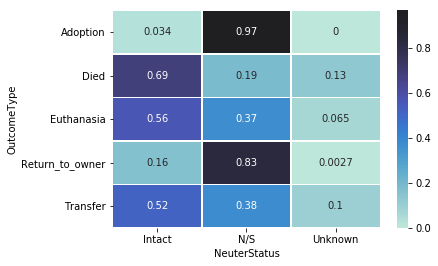

In [72]:
# from the OutType direction (normalazed by rows)
sns.heatmap(pd.crosstab(outcomes.OutcomeType, outcomes.NeuterStatus, normalize='index'), linewidths=0.5, annot=True, center=1)

In [73]:
# Insights regarding NeuterStatus:
# - 97% of adopted pets were spayed/neutered
# - 83% of RTO pets were spayed/neutered
# - 69% of Died pets and 56% of Euthanaised pets were Intact

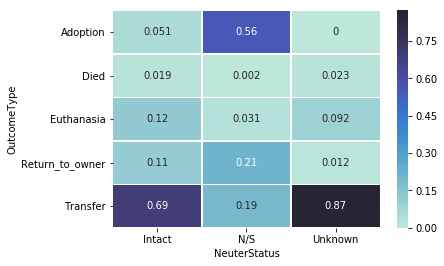

In [74]:
# from the N/S status direction (normalazed by columns)
sns.heatmap(pd.crosstab(outcomes.OutcomeType, outcomes.NeuterStatus, normalize='columns'), linewidths=0.5, annot=True, center=1)

In [75]:
# More insights regarding NeuterStatus:
# - 77% (56 + 21) of N/S pets ended well (either adopted or returned to their owners)
# - 69% of Intact pets were transferred
# - 87% of pets whose neutered/spayed status was not clear, were transferred. None of them were adopted

In [76]:
pd.crosstab(outcomes.OutcomeType, outcomes.Sex, margins=True)

Sex,Female,Male,Unknown,All
OutcomeType,,,,
Adoption,5389,5380,0,10769
Died,74,98,25,197
Euthanasia,633,821,101,1555
Return_to_owner,2049,2724,13,4786
Transfer,4186,4281,955,9422
All,12331,13304,1094,26729


In [77]:
pd.crosstab(outcomes.OutcomeType, outcomes.Sex, margins=True, normalize='index')

Sex,Female,Male,Unknown
OutcomeType,,,
Adoption,0.500418,0.499582,0.000000
Died,0.375635,0.497462,0.126904
Euthanasia,0.407074,0.527974,0.064952
Return_to_owner,0.428124,0.569160,0.002716
Transfer,0.444279,0.454362,0.101359
All,0.461334,0.497737,0.040929


In [78]:
# Insights regarding Sex:
# It seems that adoption is not related to the sex of the pet
# Males Die and Euthanaised more than females
# Males RTO more than females

In [79]:
# 3.5 AgeuponOutcome:
# ===================

In [80]:
print(outcomes.AgeuponOutcome.nunique())
outcomes.AgeuponOutcome.value_counts(dropna=False).tail(10)

44


6 days      50
16 years    36
5 days      24
0 years     22
NaN         18
17 years    17
5 weeks     11
18 years    10
19 years     3
20 years     2
Name: AgeuponOutcome, dtype: int64

In [81]:
# There are 18 empty values, and 22 samples with age '0 years'. I'll replace the empty values with the value '0 years' (although
# this is a problematic value by itself).

outcomes.AgeuponOutcome.fillna(value='0 years', inplace=True)

print(outcomes[outcomes.AgeuponOutcome == '0 years']['AnimalType'].value_counts())
print(outcomes[outcomes.AgeuponOutcome == '0 years']['OutcomeType'].value_counts())

Cat    32
Dog     8
Name: AnimalType, dtype: int64
Transfer      35
Euthanasia     4
Died           1
Name: OutcomeType, dtype: int64


In [82]:
# Insights: Most of the '0 years' pets are cats. Most of them were transferred (none of them were adopted).

In [83]:
# It is noticeable that the values of this feature are presented in various formats: day(s)/week(s)/month(s)/year(s).
# Furthermore,since there are lots of "ages" in the dataset (44 to be precise, as shown above), I will "group" them into 7
# "life stages", as follows.

In [84]:
def calc_life_stage(age):
    '''
    Returns a "life stage" to which a given age belongs.
    The defined life stages are:
        - neonatal:     birth - 4 weeks
        - puppy/kitten: 1 month - 6 months
        - junior:       7 months - 2 years
        - prime:        3 - 6 years
        - mature:       7 - 10 years
        - senior:       11 - 14 years
        - geriatric:    15+ years    
    '''
    try:
        age_val = int(age[0:2])
    except:
        return 'Neonatal'        
    if age_val == 0:
        return 'Neonatal'
    if 'day' in age or 'week' in age:
        return 'Neonatal'
    elif 'month' in age:
        if age_val <= 6:
            return 'Puppy/Kitten'
        else:
            return 'Junior'
    elif 'year' in age:
        if age_val <= 2:
            return 'Junior'
        elif age_val <= 6:
            return 'Prime'
        elif age_val <= 10:
            return 'Mature'
        elif age_val <= 14:
            return 'Senior'
        else:
            return 'Geriatric'
    else:
        return 'Other'

outcomes['LifeStage'] = outcomes['AgeuponOutcome'].apply(calc_life_stage)
outcomes.LifeStage.value_counts(dropna=False)

Junior          9248
Puppy/Kitten    8083
Prime           4556
Neonatal        2288
Mature          1801
Senior           600
Geriatric        153
Name: LifeStage, dtype: int64

In [85]:
# Converting LifeStage to a categorical and specifying an order on the categories (for using logical order)
life_stages = ['Neonatal', 'Puppy/Kitten', 'Junior', 'Prime', 'Mature', 'Senior', 'Geriatric']
life_stages_cat_type = CategoricalDtype(categories=life_stages, ordered=True)

outcomes['LifeStage'] = outcomes['LifeStage'].astype(life_stages_cat_type)

In [86]:
pd.crosstab(outcomes.LifeStage.sort_values(), outcomes.OutcomeType)

OutcomeType,Adoption,Died,Euthanasia,Return_to_owner,Transfer
LifeStage,,,,,
Neonatal,0,56,80,29,2123
Puppy/Kitten,4984,80,259,263,2497
Junior,3698,33,493,1870,3154
Prime,1447,11,366,1587,1145
Mature,511,14,199,685,392
Senior,112,3,120,272,93
Geriatric,17,0,38,80,18


In [87]:
# Normalization by OutcomeType
outcome_age_crstb = pd.crosstab(outcomes.LifeStage.sort_values(), outcomes.OutcomeType, normalize='columns')

In [88]:
outcome_age_crstb

OutcomeType,Adoption,Died,Euthanasia,Return_to_owner,Transfer
LifeStage,,,,,
Neonatal,0.000000,0.284264,0.051447,0.006059,0.225324
Puppy/Kitten,0.462810,0.406091,0.166559,0.054952,0.265018
Junior,0.343393,0.167513,0.317042,0.390723,0.334748
Prime,0.134367,0.055838,0.235370,0.331592,0.121524
Mature,0.047451,0.071066,0.127974,0.143126,0.041605
Senior,0.010400,0.015228,0.077170,0.056832,0.009871
Geriatric,0.001579,0.000000,0.024437,0.016715,0.001910


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C6B35F8>,
      dtype=object)

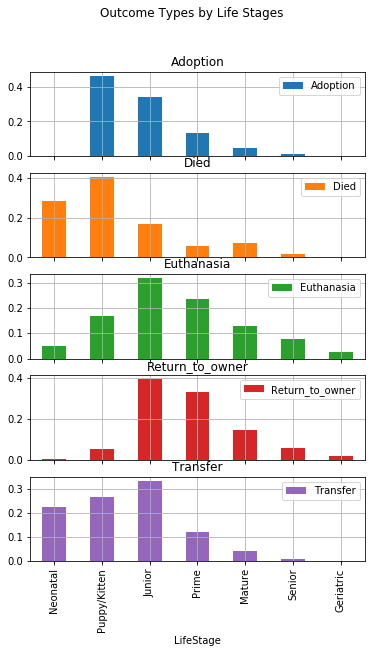

In [89]:
outcome_age_crstb.plot(kind='bar', title='Outcome Types by Life Stages', grid=True, figsize=(6,9), subplots=True)

In [90]:
# Insights:
# - Adoption:
#     - Pets are not adopted until they're at least 1 month old. 
#     - Pets are almost not adopted at the Mature stage or older
#     - Pets are mostly adopted when they're at the Puppy/Kitten stage. After that - as Juniors
# - RTO:
#     - Pets are returned to their owners mostly as Junior or Prime
# - Die:
#     - Pets mostly Die in the Neonatal and Puppy/Kitten stages. 
# - Euthanasia:
#     - Pets mostly Eunathaised in the Junior and Prime stages

In [91]:
# Normalization by LifeStage
age_outcome_crstb = pd.crosstab(outcomes.OutcomeType, outcomes.LifeStage.sort_values(), normalize='columns', margins=True)

In [92]:
age_outcome_crstb

LifeStage,Neonatal,Puppy/Kitten,Junior,Prime,Mature,Senior,Geriatric,All
OutcomeType,,,,,,,,
Adoption,0.000000,0.616603,0.399870,0.317603,0.283731,0.186667,0.111111,0.402896
Died,0.024476,0.009897,0.003568,0.002414,0.007773,0.005000,0.000000,0.007370
Euthanasia,0.034965,0.032043,0.053309,0.080334,0.110494,0.200000,0.248366,0.058177
Return_to_owner,0.012675,0.032537,0.202206,0.348332,0.380344,0.453333,0.522876,0.179056
Transfer,0.927885,0.308920,0.341047,0.251317,0.217657,0.155000,0.117647,0.352501


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D93AD68>,
      dtype=object)

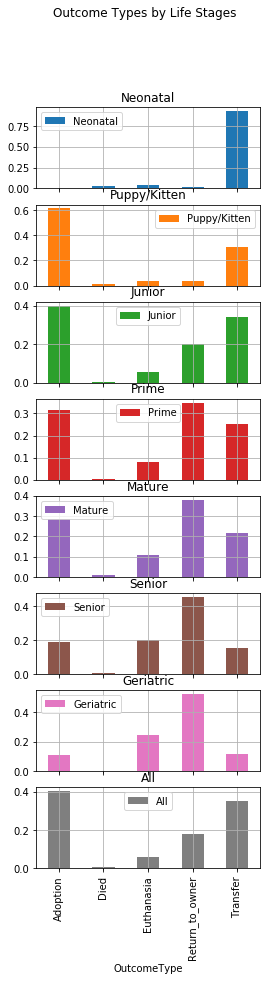

In [93]:
age_outcome_crstb.plot(kind='bar', title='Outcome Types by Life Stages', grid=True, figsize=(4,14), subplots=True)

In [94]:
# Insights:
# - Neonatal:
#     - Pets are not adopted during their Neonatal period (as seen earlier) 
#     - Being in the Neonatal life stage, there's almost 93% chance to be trasferred
#     - Chances to Die are high
# - Puppy/Kitten:
#     - As a Puppy/Kitten, there's 61% chance to be Adopted
#     - Chances to Die are also high
# - Junior:
#     - As a Junior, there's almost 40% chance to be Adopted; 34% chance to be transferred
# - Mature:
#     - As a Mature pet, there's 38% chance to be RTO
# - Senior:
#     - As a Senior, there's 45% chance to be RTO
# - Geriatric:
#     - As a Geriatric pet, there's 52% chance to be RTO, 24% to be Euthanaised and only 11% chance to be adopted

In [95]:
# Separating between Dogs and Cats

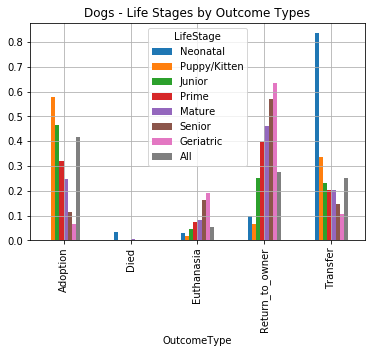

In [96]:
dogs_outcomes = outcomes[outcomes.AnimalType == 'Dog']
pd.crosstab(dogs_outcomes.OutcomeType, dogs_outcomes.LifeStage, normalize='columns', margins=True). \
            plot(kind='bar', title='Dogs - Life Stages by Outcome Types', grid=True, figsize=(6,4))

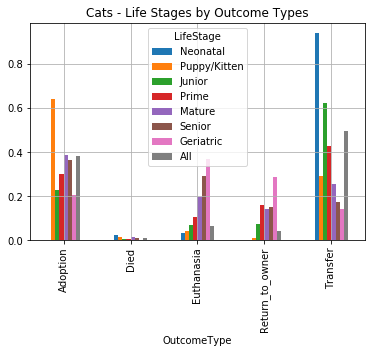

In [97]:
cats_outcomes = outcomes[outcomes.AnimalType == 'Cat']
pd.crosstab(cats_outcomes.OutcomeType, cats_outcomes.LifeStage, normalize='columns', margins=True). \
            plot(kind='bar', title='Cats - Life Stages by Outcome Types', grid=True, figsize=(6,4))

In [98]:
# Insights about main differences between Dogs and Cats regarding Age:
# - While Junior dogs' chances to be Adopted are rising, Junior cats' chances are falling
# - Senior dogs' chances to be Adopted are much lower than Senior cats'
# - Senior and Geriatric cats' chances to be Euthaaised are higher than Senior and Geriatric dogs'
# - Junior cats' chances to be Transferred are higher than Junior dogs'

In [99]:
# 3.6 Breed:
# ==========

# First - some exploration of this feature

In [100]:
outcomes.Breed.nunique()

1380

In [101]:
dogs_outcomes = outcomes[outcomes.AnimalType == 'Dog']
cats_outcomes = outcomes[outcomes.AnimalType == 'Cat']

In [102]:
# Dogs
# ====

dogs_outcomes.Breed.nunique()

1320

In [103]:
dogs_popularity = dogs_outcomes['Breed'].value_counts()
dogs_popularity

Pit Bull Mix                                      1906
Chihuahua Shorthair Mix                           1766
Labrador Retriever Mix                            1363
German Shepherd Mix                                575
Australian Cattle Dog Mix                          367
Dachshund Mix                                      318
Boxer Mix                                          245
Miniature Poodle Mix                               233
Border Collie Mix                                  229
Australian Shepherd Mix                            163
Catahoula Mix                                      157
Rat Terrier Mix                                    157
Jack Russell Terrier Mix                           146
Yorkshire Terrier Mix                              143
Chihuahua Longhair Mix                             142
Siberian Husky Mix                                 138
Miniature Schnauzer Mix                            136
Beagle Mix                                         124
Rottweiler

In [104]:
# number of breeds that contains 80% of all dogs
number_of_popular_dogs = dogs_popularity.cumsum().searchsorted(0.8*animal_types.loc['Dog'])[0]
number_of_popular_dogs

121

In [105]:
# Cats
# ====

cats_outcomes.Breed.nunique()

60

In [106]:
cats_popularity = cats_outcomes['Breed'].value_counts()
cats_popularity

Domestic Shorthair Mix                     8810
Domestic Medium Hair Mix                    839
Domestic Longhair Mix                       520
Siamese Mix                                 389
Domestic Shorthair                          143
Snowshoe Mix                                 75
Maine Coon Mix                               44
Manx Mix                                     44
Domestic Medium Hair                         42
Russian Blue Mix                             33
Siamese                                      24
Domestic Longhair                            23
Himalayan Mix                                15
Persian Mix                                  12
Ragdoll Mix                                  11
Siamese/Domestic Shorthair                   11
American Shorthair Mix                        9
Angora Mix                                    7
Japanese Bobtail Mix                          6
Bombay Mix                                    5
Balinese Mix                            

In [107]:
# number of breeds that contains 80% of all cats
number_of_popular_cats = cats_popularity.cumsum().searchsorted(0.8*animal_types.loc['Cat'])[0]
number_of_popular_cats

1

In [108]:
# As shown above, there are 1,380 different values in the Breed column. Some of the values include the word 'Mix', some of them
# consist of two breeds (separated by '/') and some consist of one "pure" breed.
# I'll try to deal with this feature and its correlation with the pets OutcomeTypes, in several different ways:
#   a. Creating a new 'BreedPurity' column, whose values would relate to the "purity" of the breed
#   b. Narrowing the variety of values by adding a new 'MainBreed' column which will hold the "main breed" of each pet
#   c. Presenting additional data that I've found in external sources, based on the pets' breeds

In [109]:
# First, I'd like to check whether there are values which contain more than one '/'

In [110]:
check_slash_breed = outcomes.Breed.apply(lambda breed: breed if breed.count('/') > 1 else None)

In [111]:
check_slash_breed.value_counts()

Labrador Retriever/Black/Tan Hound    4
Black/Tan Hound/Black Mouth Cur       2
Plott Hound/Black/Tan Hound           1
Black/Tan Hound/Labrador Retriever    1
Black/Tan Hound/German Shepherd       1
German Shepherd/Black/Tan Hound       1
Name: Breed, dtype: int64

In [112]:
# I'll now convert the 'Black/Tan Hound' string to 'Black and Tan Hound'
outcomes.Breed = outcomes.Breed.apply(lambda breed: breed.replace('Black/Tan Hound', 'Black and Tan Hound') \
                                      if 'Black/Tan Hound' in breed else breed)

In [113]:
# 3.6.a Creating a new 'BreedPurity' column, as follows:

def calc_breed_type(breed):
    '''
    Returns a "breed purity" of a given breed.
    The defined values of breed purity are:
        - Mix: in case the word 'Mix' exists in the breed
        - Crossbreeds: in case the sign '/' exists in the breed
        - Purebred: in case the value consists of one breed only (no 'mix' and no '/')    
    '''
    if 'Mix' in breed:
        return 'Mix'
    if '/' in breed:
        return 'Crossbreeds'
    return 'Purebred'

outcomes['BreedPurity'] = outcomes['Breed'].apply(calc_breed_type)

In [114]:
outcomes.head()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Named,UnNamed,DayOfWeek,Quarter,Holiday,Sex,NeuterStatus,LifeStage,BreedPurity
AnimalID,,,,,,,,,,,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,1,0,Wednesday,1,Valentines Day,Male,N/S,Junior,Mix
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1,0,Sunday,4,Columbus Day,Female,N/S,Junior,Mix
A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,1,0,Saturday,1,No Holiday,Male,N/S,Junior,Mix
A683430,Unknown,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,0,1,Friday,3,No Holiday,Male,Intact,Neonatal,Mix
A667013,Unknown,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,0,1,Friday,4,No Holiday,Male,N/S,Junior,Crossbreeds


In [115]:
outcomes.BreedPurity.value_counts(dropna=False)

Mix            22298
Crossbreeds     3037
Purebred        1394
Name: BreedPurity, dtype: int64

In [116]:
pd.crosstab(outcomes.OutcomeType, outcomes.BreedPurity, normalize='columns', margins=True)

BreedPurity,Crossbreeds,Mix,Purebred,All
OutcomeType,,,,
Adoption,0.504774,0.394295,0.318508,0.402896
Died,0.002963,0.008072,0.005739,0.007370
Euthanasia,0.041818,0.061171,0.045911,0.058177
Return_to_owner,0.208759,0.166383,0.317073,0.179056
Transfer,0.241686,0.370078,0.312769,0.352501


In [117]:
# Looking separately at Dogs and Cats:

dogs_outcomes = outcomes[outcomes.AnimalType == 'Dog']
cats_outcomes = outcomes[outcomes.AnimalType == 'Cat']

In [118]:
dogs_outcomes.BreedPurity.value_counts(dropna=False)

Mix            11445
Crossbreeds     3009
Purebred        1141
Name: BreedPurity, dtype: int64

In [119]:
dogs_breed_outcome_crstb = pd.crosstab(dogs_outcomes.OutcomeType, dogs_outcomes.BreedPurity, normalize='columns', margins=True)

In [120]:
dogs_breed_outcome_crstb

BreedPurity,Crossbreeds,Mix,Purebred,All
OutcomeType,,,,
Adoption,0.505484,0.405767,0.290973,0.416608
Died,0.002659,0.003320,0.003506,0.003206
Euthanasia,0.041874,0.058453,0.043821,0.054184
Return_to_owner,0.210369,0.281695,0.375986,0.274832
Transfer,0.239614,0.250765,0.285714,0.251170


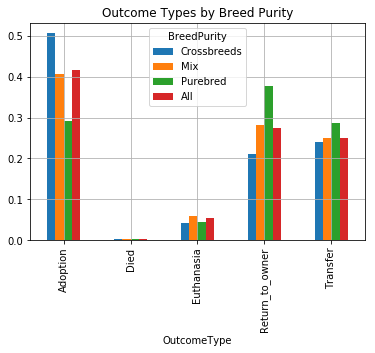

In [121]:
dogs_breed_outcome_crstb.plot(kind='bar', title='Outcome Types by Breed Purity', grid=True, figsize=(6,4), subplots=False)

In [122]:
# Insights regarding dogs:
# - As a Crossbreeds dog, your chances of being Adopted are rising, and your chances of being RTO are falling
# - As a Purebed dog, your chances of being Adopted are falling, and your chances of being RTO are rising (which is not
#   surprising, as it might be an expensive or rare dog, whom the owner would try hard to find)    

In [123]:
cats_outcomes.BreedPurity.value_counts(dropna=False)

Mix            10853
Purebred         253
Crossbreeds       28
Name: BreedPurity, dtype: int64

In [124]:
cats_breed_outcome_crstb = pd.crosstab(dogs_outcomes.OutcomeType, dogs_outcomes.BreedPurity, normalize='columns', margins=True)

In [125]:
cats_breed_outcome_crstb

BreedPurity,Crossbreeds,Mix,Purebred,All
OutcomeType,,,,
Adoption,0.505484,0.405767,0.290973,0.416608
Died,0.002659,0.003320,0.003506,0.003206
Euthanasia,0.041874,0.058453,0.043821,0.054184
Return_to_owner,0.210369,0.281695,0.375986,0.274832
Transfer,0.239614,0.250765,0.285714,0.251170


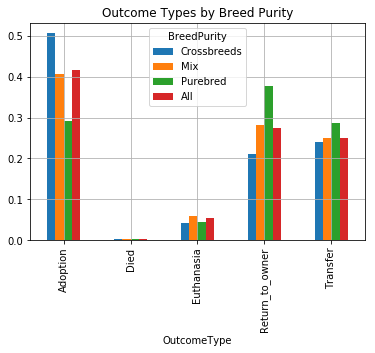

In [126]:
cats_breed_outcome_crstb.plot(kind='bar', title='Outcome Types by Breed Purity', grid=True, figsize=(6,4))

In [127]:
# Insights regarding Cats:
# - As a Crossbreeds cat, your chances of being Adopted are rising, and your chances of being RTO are falling
# - As a Purebed cat, your chances of being Adopted are falling, and your chances of being RTO are rising (same as dogs). Your
#   chances of being Transferred are a bit rising
# Note: Percentage of 'Mix' cats is very high (97.5%), so the contribution of this feature to the Model is doubtful

In [128]:
# 3.6.b Narrowing the variety of values by adding a new column which will hold the "main breed" of each pet. 

def calc_main_breed(breed):
    """Returns the first breed of the original value, by taking the letters from the beginning till 'Mix' or '/'"""
    breed = breed.replace(' Mix', '')
    try:
        return breed[:breed.index('/')]
    except:
        return breed
    
outcomes['MainBreed'] = outcomes['Breed'].apply(calc_main_breed)


In [129]:
outcomes.head()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Named,UnNamed,DayOfWeek,Quarter,Holiday,Sex,NeuterStatus,LifeStage,BreedPurity,MainBreed
AnimalID,,,,,,,,,,,,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,1,0,Wednesday,1,Valentines Day,Male,N/S,Junior,Mix,Shetland Sheepdog
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1,0,Sunday,4,Columbus Day,Female,N/S,Junior,Mix,Domestic Shorthair
A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,1,0,Saturday,1,No Holiday,Male,N/S,Junior,Mix,Pit Bull
A683430,Unknown,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,0,1,Friday,3,No Holiday,Male,Intact,Neonatal,Mix,Domestic Shorthair
A667013,Unknown,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,0,1,Friday,4,No Holiday,Male,N/S,Junior,Crossbreeds,Lhasa Apso


In [130]:
outcomes.MainBreed.nunique()

220

In [131]:
# Number of unique breeds went down from 1,380 to 220 (still high...)

In [132]:
# Looking separately at Dogs and Cats:

dogs_outcomes = outcomes[outcomes.AnimalType == 'Dog']
cats_outcomes = outcomes[outcomes.AnimalType == 'Cat']

In [133]:
dogs_outcomes.MainBreed.nunique()

187

In [134]:
dogs_outcomes.MainBreed.value_counts().head()

Chihuahua Shorthair      2145
Pit Bull                 2113
Labrador Retriever       1915
German Shepherd           826
Australian Cattle Dog     511
Name: MainBreed, dtype: int64

In [135]:
dogs_breed_outcome_crstb = pd.crosstab(dogs_outcomes.MainBreed, dogs_outcomes.OutcomeType, normalize='index', margins=True)

In [136]:
dogs_breed_outcome_crstb

OutcomeType,Adoption,Died,Euthanasia,Return_to_owner,Transfer
MainBreed,,,,,
Affenpinscher,0.666667,0.000000,0.000000,0.333333,0.000000
Afghan Hound,0.000000,0.000000,0.000000,1.000000,0.000000
Airedale Terrier,0.250000,0.000000,0.000000,0.250000,0.500000
Akita,0.476190,0.000000,0.095238,0.285714,0.142857
Alaskan Husky,0.437500,0.000000,0.000000,0.437500,0.125000
Alaskan Malamute,0.363636,0.000000,0.000000,0.545455,0.090909
American Bulldog,0.346154,0.000000,0.100000,0.323077,0.230769
American Eskimo,0.428571,0.000000,0.142857,0.285714,0.142857
American Foxhound,0.400000,0.000000,0.000000,0.600000,0.000000


In [137]:
cats_outcomes.MainBreed.nunique()

33

In [138]:
cats_outcomes.MainBreed.value_counts().head()

Domestic Shorthair      8958
Domestic Medium Hair     883
Domestic Longhair        547
Siamese                  426
Snowshoe                  78
Name: MainBreed, dtype: int64

In [139]:
cats_breed_outcome_crstb = pd.crosstab(cats_outcomes.MainBreed, cats_outcomes.OutcomeType, normalize='index', margins=True)

In [140]:
cats_breed_outcome_crstb

OutcomeType,Adoption,Died,Euthanasia,Return_to_owner,Transfer
MainBreed,,,,,
Abyssinian,1.000000,0.000000,0.000000,0.000000,0.000000
American Shorthair,0.000000,0.000000,0.111111,0.111111,0.777778
Angora,0.571429,0.000000,0.000000,0.142857,0.285714
Balinese,0.800000,0.000000,0.000000,0.000000,0.200000
Bengal,0.600000,0.000000,0.000000,0.200000,0.200000
Bombay,0.400000,0.000000,0.000000,0.400000,0.200000
British Shorthair,0.500000,0.000000,0.000000,0.250000,0.250000
Burmese,1.000000,0.000000,0.000000,0.000000,0.000000
Cornish Rex,0.000000,0.000000,0.000000,1.000000,0.000000


In [141]:
# 3.6.c Presenting additional data from external sources, based on the pets' breeds:

#       CATS:
#       ----
#       As shown above, the most 3 frequent cats' "MainBreeds", are: Domestic Shorthair (8,958), Domestic Medium Hair (883) and
#       Domestic Longhair (547). Actually, these are not "real" breeds (cats of mixed ancestry – thus not belonging to any
#       particular recognised cat breed) and as such, it was impossible to find external statistical data about them. 
#       Since these 3 "breeds" together constitute about 93% of all cats' samples, there's no use of trying to elaborate on
#       the cats' breeds.

#       DOGS:
#       ----
#       As mentioned above, it seems that there are features, that are missing and could be useful, such as dog's size and 
#       other typical characteristics. While seeking these data, I found the following:
#       i.   a CSV file with dog breeds' "families", such as: Herding, Hound, Toy, etc.
#       ii.  a json file which summarizes significant characteristics of numerous breeds of dogs, such as: size, frienliness,
#            level of shedding, etc.
#       I will now elaborate on that, as follows.

In [142]:
# i. Breeds Families

families = pd.read_csv('breeds_families.csv', index_col='Breed')

In [143]:
families.head()

,Family
Breed,
Affenpinscher,Toy
Afghan Hound,Hound
Airedale Terrier,Terrier
Akita,Working
Alaskan Husky,Working


In [144]:
families.Family.value_counts()

Working      36
Hound        36
Herding      35
Terrier      33
Sporting     31
Toy          24
Companion    21
Pit Bull      1
Name: Family, dtype: int64

In [145]:
families.describe()

,Family
count,217
unique,8
top,Working
freq,36


In [146]:
def find_dog_family(row):
    """
    If Cat - return 'Irrelevant'.
    If the dog's MainBreed exists in the families dataframe - return the family, else return 'Unknown'
    """
    if row.loc['AnimalType'] == 'Cat':
        return 'Irrelevant'
    try:
        return families.loc[row.loc['MainBreed']][0]
    except:
        return 'Unknown'
   
outcomes['DogFamily'] = outcomes.apply(find_dog_family, axis=1)

In [147]:
outcomes.head()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Named,UnNamed,DayOfWeek,Quarter,Holiday,Sex,NeuterStatus,LifeStage,BreedPurity,MainBreed,DogFamily
AnimalID,,,,,,,,,,,,,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,1,0,Wednesday,1,Valentines Day,Male,N/S,Junior,Mix,Shetland Sheepdog,Herding
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1,0,Sunday,4,Columbus Day,Female,N/S,Junior,Mix,Domestic Shorthair,Irrelevant
A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,1,0,Saturday,1,No Holiday,Male,N/S,Junior,Mix,Pit Bull,Pit Bull
A683430,Unknown,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,0,1,Friday,3,No Holiday,Male,Intact,Neonatal,Mix,Domestic Shorthair,Irrelevant
A667013,Unknown,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,0,1,Friday,4,No Holiday,Male,N/S,Junior,Crossbreeds,Lhasa Apso,Companion


In [148]:
outcomes.DogFamily.value_counts(dropna=False)

Irrelevant    11134
Toy            3596
Herding        2569
Sporting       2432
Pit Bull       2113
Working        1489
Terrier        1440
Hound          1414
Companion       454
Unknown          88
Name: DogFamily, dtype: int64

In [149]:
dogs_outcomes = outcomes[(outcomes.AnimalType == 'Dog') & (outcomes.DogFamily != 'Unknown')]

In [150]:
dogs_outcomes.DogFamily.value_counts(dropna=False)

Toy          3596
Herding      2569
Sporting     2432
Pit Bull     2113
Working      1489
Terrier      1440
Hound        1414
Companion     454
Name: DogFamily, dtype: int64

In [151]:
pd.crosstab(dogs_outcomes.OutcomeType, dogs_outcomes.DogFamily, margins=True)

DogFamily,Companion,Herding,Hound,Pit Bull,Sporting,Terrier,Toy,Working,All
OutcomeType,,,,,,,,,
Adoption,135,1224,659,625,1065,659,1513,569,6449
Died,3,6,1,8,6,3,18,5,50
Euthanasia,27,113,37,287,97,52,135,93,841
Return_to_owner,163,642,343,678,652,391,927,478,4274
Transfer,126,584,374,515,612,335,1003,344,3893
All,454,2569,1414,2113,2432,1440,3596,1489,15507


In [152]:
dogs_outcome_family_crstb = pd.crosstab(dogs_outcomes.OutcomeType, dogs_outcomes.DogFamily, normalize='columns', margins=True)

In [153]:
dogs_outcome_family_crstb

DogFamily,Companion,Herding,Hound,Pit Bull,Sporting,Terrier,Toy,Working,All
OutcomeType,,,,,,,,,
Adoption,0.297357,0.476450,0.466054,0.295788,0.437911,0.457639,0.420745,0.382136,0.415877
Died,0.006608,0.002336,0.000707,0.003786,0.002467,0.002083,0.005006,0.003358,0.003224
Euthanasia,0.059471,0.043986,0.026167,0.135826,0.039885,0.036111,0.037542,0.062458,0.054234
Return_to_owner,0.359031,0.249903,0.242574,0.320871,0.268092,0.271528,0.257786,0.321021,0.275617
Transfer,0.277533,0.227326,0.264498,0.243729,0.251645,0.232639,0.278921,0.231028,0.251048


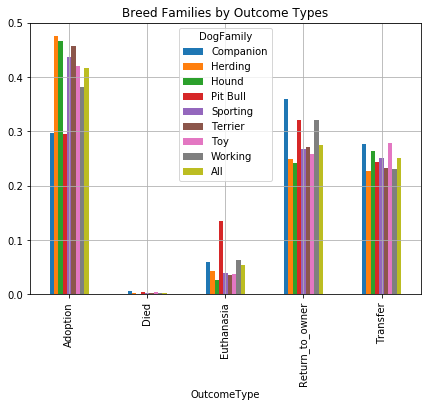

In [154]:
dogs_outcome_family_crstb.plot(kind='bar', title='Breed Families by Outcome Types', grid=True, figsize=(7,5))

In [155]:
dogs_family_outcome_crstb = pd.crosstab(dogs_outcomes.DogFamily, dogs_outcomes.OutcomeType, normalize='index', margins=True)

In [156]:
dogs_family_outcome_crstb

OutcomeType,Adoption,Died,Euthanasia,Return_to_owner,Transfer
DogFamily,,,,,
Companion,0.297357,0.006608,0.059471,0.359031,0.277533
Herding,0.476450,0.002336,0.043986,0.249903,0.227326
Hound,0.466054,0.000707,0.026167,0.242574,0.264498
Pit Bull,0.295788,0.003786,0.135826,0.320871,0.243729
Sporting,0.437911,0.002467,0.039885,0.268092,0.251645
Terrier,0.457639,0.002083,0.036111,0.271528,0.232639
Toy,0.420745,0.005006,0.037542,0.257786,0.278921
Working,0.382136,0.003358,0.062458,0.321021,0.231028
All,0.415877,0.003224,0.054234,0.275617,0.251048


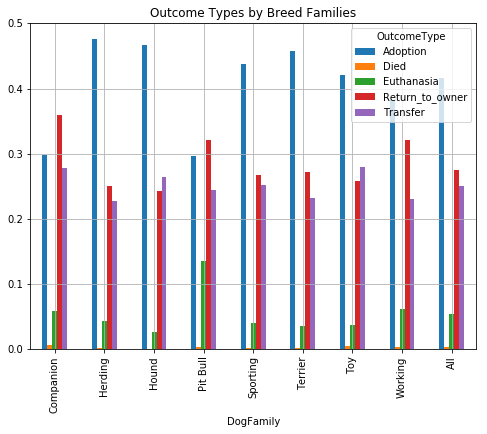

In [157]:
dogs_family_outcome_crstb.plot(kind='bar', title='Outcome Types by Breed Families', grid=True, figsize=(8,6))

In [158]:
# Insights regarding Dog breeds Families:
# - As a Herding/Hound/Terrier/Sporting/Toy dog, your chances of being Adopted are rising
# - As a Companion/Pit Bull dog, your chances of being Adopted are significantly falling
# - As a Pit Bull, your chances of being Euthanaised are significantly rising
# - As a Hound dog, your chances of being Euthanaised are significantly falling
# - As a Toy/Companion dog, your chances to Die are rising
# - As a Companion/Working/Pit Bull dog, your chances of being RTO are rising. These chances are falling for Herding/Hound dogs

In [159]:
# ii. Dogs' Breeds Characteristics

import json

In [160]:
# Reading a json file, which contains main characteristics of dogs' breeds. Each characteristic is given as a grade from 1 to 5

with open('dogs_characteristics.json', encoding='utf-8') as f:
    dogs_chars = pd.DataFrame.from_dict(json.load(f))

In [161]:
dogs_chars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 14 columns):
dogFriendly      202 non-null int64
easyToGroom      202 non-null int64
easyToTrain      202 non-null int64
goodHealth       202 non-null int64
highEnergy       202 non-null int64
id               202 non-null object
intelligence     202 non-null int64
kidFriendly      202 non-null int64
lowBarking       202 non-null int64
lowShedding      202 non-null int64
name             202 non-null object
size             202 non-null int64
toleratesCold    202 non-null int64
toleratesHot     202 non-null int64
dtypes: int64(12), object(2)
memory usage: 22.2+ KB


In [162]:
dogs_chars.name.nunique()

202

In [163]:
dogs_chars.set_index('name', inplace=True)

In [164]:
# 'id' is not necessary. The 'name' column represents the dog's breed
dogs_chars.drop(columns='id', inplace=True)         

In [165]:
# rename column 'size' (pandas' method name) to 'dogSize'
dogs_chars.rename(columns={"size": "dogSize"}, inplace=True)

In [166]:
dogs_chars.head()

,dogFriendly,easyToGroom,easyToTrain,goodHealth,highEnergy,intelligence,kidFriendly,lowBarking,lowShedding,dogSize,toleratesCold,toleratesHot
name,,,,,,,,,,,,
Affenpinscher,1,3,2,4,4,4,1,4,5,1,3,3
Afghan Hound,5,1,1,3,5,4,5,4,2,4,5,5
Airedale Terrier,4,2,4,3,5,5,4,2,4,3,3,3
Akita,1,1,2,4,4,3,1,1,1,4,5,2
Alaskan Malamute,3,1,4,4,5,4,3,1,1,4,5,2


In [167]:
# Joining the dogs_chars df with the outcomes df (dogs_chars.name and outcomes.MainBreed are the "keys" for this join)

In [168]:
outcomes = outcomes.join(dogs_chars, on='MainBreed')
outcomes.head()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Named,...,easyToTrain,goodHealth,highEnergy,intelligence,kidFriendly,lowBarking,lowShedding,dogSize,toleratesCold,toleratesHot
AnimalID,,,,,,,,,,,,,,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,1,...,5.0,4.0,4.0,5.0,5.0,5.0,1.0,1.0,4.0,3.0
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A683430,Unknown,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A667013,Unknown,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,0,...,3.0,3.0,4.0,4.0,4.0,2.0,3.0,1.0,3.0,2.0


In [169]:
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26729 entries, A671945 to A706629
Data columns (total 32 columns):
Name              26729 non-null object
DateTime          26729 non-null datetime64[ns]
OutcomeType       26729 non-null object
OutcomeSubtype    13117 non-null object
AnimalType        26729 non-null object
SexuponOutcome    26729 non-null object
AgeuponOutcome    26729 non-null object
Breed             26729 non-null object
Color             26729 non-null object
Named             26729 non-null int64
UnNamed           26729 non-null int64
DayOfWeek         26729 non-null category
Quarter           26729 non-null int64
Holiday           26729 non-null object
Sex               26729 non-null object
NeuterStatus      26729 non-null object
LifeStage         26729 non-null category
BreedPurity       26729 non-null object
MainBreed         26729 non-null object
DogFamily         26729 non-null object
dogFriendly       12428 non-null float64
easyToGroom       12428 non-null float

In [170]:
def fill_none(row):
    """
    Replace values in the new columns as folows:
      - If Cat - replace with 999 (irrelevant)
      - If Dog - replace None values with 888 (unknown)
    """
    if row.loc['AnimalType'] == 'Cat':
        for col in cols:
            row.loc[col] = 999
    else:
        for col in cols:
            if pd.isna(row.loc[col]):
                row.loc[col] = 888
    return row

cols = list(dogs_chars.columns)                    # a list of the new columns
outcomes = outcomes.apply(fill_none, axis=1)
outcomes[cols] = outcomes[cols].astype(int)        # convert from float to int

In [171]:
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26729 entries, A671945 to A706629
Data columns (total 32 columns):
Name              26729 non-null object
DateTime          26729 non-null datetime64[ns]
OutcomeType       26729 non-null object
OutcomeSubtype    13117 non-null object
AnimalType        26729 non-null object
SexuponOutcome    26729 non-null object
AgeuponOutcome    26729 non-null object
Breed             26729 non-null object
Color             26729 non-null object
Named             26729 non-null int64
UnNamed           26729 non-null int64
DayOfWeek         26729 non-null object
Quarter           26729 non-null int64
Holiday           26729 non-null object
Sex               26729 non-null object
NeuterStatus      26729 non-null object
LifeStage         26729 non-null object
BreedPurity       26729 non-null object
MainBreed         26729 non-null object
DogFamily         26729 non-null object
dogFriendly       26729 non-null int32
easyToGroom       26729 non-null int32
easyT

In [172]:
outcomes.head()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Named,...,easyToTrain,goodHealth,highEnergy,intelligence,kidFriendly,lowBarking,lowShedding,dogSize,toleratesCold,toleratesHot
AnimalID,,,,,,,,,,,,,,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,1,...,5,4,4,5,5,5,1,1,4,3
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1,...,999,999,999,999,999,999,999,999,999,999
A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,1,...,888,888,888,888,888,888,888,888,888,888
A683430,Unknown,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,0,...,999,999,999,999,999,999,999,999,999,999
A667013,Unknown,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,0,...,3,3,4,4,4,2,3,1,3,2


In [173]:
# Investigating the new features
# ------------------------------

In [174]:
outcomes['dogSize'].value_counts()

999    11134
1       4133
4       3687
888     3167
3       2646
2       1570
5        392
Name: dogSize, dtype: int64

In [175]:
dogs_outcomes = outcomes[(outcomes['AnimalType'] == 'Dog') & (outcomes['dogSize'] != 888)]

In [176]:
dogs_outcomes['dogSize'].value_counts()

1    4133
4    3687
3    2646
2    1570
5     392
Name: dogSize, dtype: int64

In [177]:
pd.crosstab(dogs_outcomes.OutcomeType, dogs_outcomes.dogSize, margins=True)

dogSize,1,2,3,4,5,All
OutcomeType,,,,,,
Adoption,1778,634,1172,1613,158,5355
Died,19,5,5,8,4,41
Euthanasia,147,50,123,170,10,500
Return_to_owner,984,517,742,1025,101,3369
Transfer,1205,364,604,871,119,3163
All,4133,1570,2646,3687,392,12428


In [178]:
dogs_outcome_size_crstb = pd.crosstab(dogs_outcomes.OutcomeType, dogs_outcomes.dogSize, normalize='columns', margins=True)
dogs_outcome_size_crstb

dogSize,1,2,3,4,5,All
OutcomeType,,,,,,
Adoption,0.430196,0.403822,0.442933,0.437483,0.403061,0.430882
Died,0.004597,0.003185,0.001890,0.002170,0.010204,0.003299
Euthanasia,0.035567,0.031847,0.046485,0.046108,0.025510,0.040232
Return_to_owner,0.238084,0.329299,0.280423,0.278004,0.257653,0.271081
Transfer,0.291556,0.231847,0.228269,0.236235,0.303571,0.254506


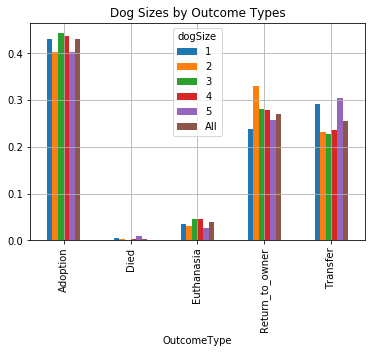

In [179]:
dogs_outcome_size_crstb.plot(kind='bar', title='Dog Sizes by Outcome Types', grid=True, figsize=(6,4))

In [180]:
# Insights regarding Dogs' sizes:
# - As a very big dog (size=5), your chances to Die or to be Transferred are rising. Your chances of being Adopted are falling
# - As a  dog of size = 2, your chances of being RTO are significantly rising. Your chances of being Adopted are falling
# - As a very small dog (size=1), your chances to be Transferred are rising. Your chances of being RTO are falling

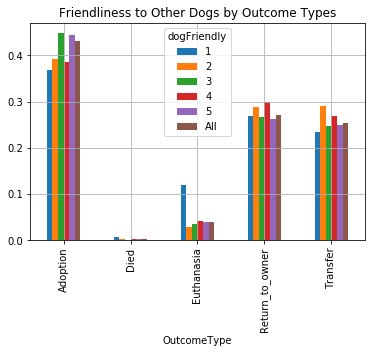

In [181]:
pd.crosstab(dogs_outcomes.OutcomeType, dogs_outcomes.dogFriendly, normalize='columns', margins=True). \
            plot(kind='bar', title='Friendliness to Other Dogs by Outcome Types', grid=True, figsize=(6,4))

In [182]:
# Insights regarding Dogs' level of friendliness to other dogs:
# - As an unfriendly dog (to other dogs), your chances to Die or to be Euthanaised are significally rising. Your chances of
#   being Adopted are falling

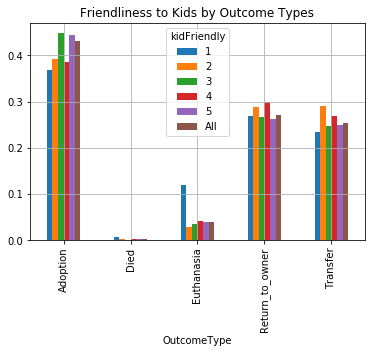

In [183]:
pd.crosstab(dogs_outcomes.OutcomeType, dogs_outcomes.kidFriendly, normalize='columns', margins=True). \
            plot(kind='bar', title='Friendliness to Kids by Outcome Types', grid=True, figsize=(6,4))

In [184]:
# Insights regarding Dogs' level of friendliness to kids (very similar to dogFriendly):
# - As an unfriendly dog (to kids), your chances to Die or to be Euthanaised are significally rising. Your chances of
#   being Adopted are falling

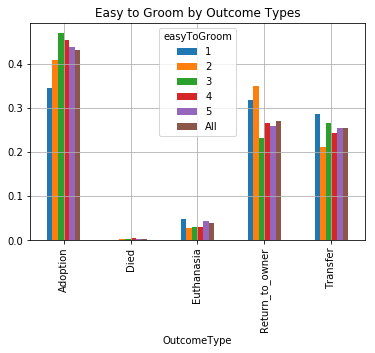

In [185]:
pd.crosstab(dogs_outcomes.OutcomeType, dogs_outcomes.easyToGroom, normalize='columns', margins=True). \
            plot(kind='bar', title='Easy to Groom by Outcome Types', grid=True, figsize=(6,4))

In [186]:
# Insights regarding Dogs' ease of grooming:
# - As a dog with low levels of ease-of-grooming, your chances to be Adopted are falling, while your chances of being 
#   Euthanaised or Transferred are rising

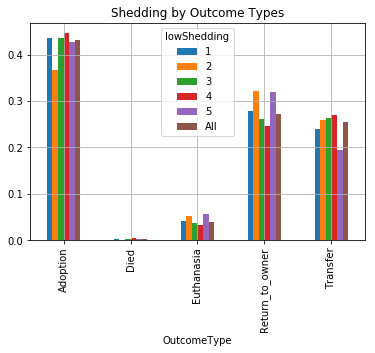

In [187]:
pd.crosstab(dogs_outcomes.OutcomeType, dogs_outcomes.lowShedding, normalize='columns', margins=True). \
            plot(kind='bar', title='Shedding by Outcome Types', grid=True, figsize=(6,4))

In [188]:
# Insights regarding Dogs' level of Shedding:
# - As a dog with level of shedding = 2, your chances to be Adopted are falling, while your chances of being 
#   Euthanaised or RTO are rising (can't find an explanation for this insight...)

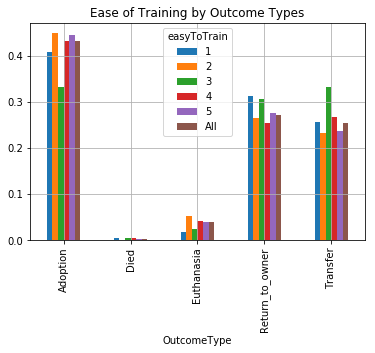

In [189]:
pd.crosstab(dogs_outcomes.OutcomeType, dogs_outcomes.easyToTrain, normalize='columns', margins=True). \
            plot(kind='bar', title='Ease of Training by Outcome Types', grid=True, figsize=(6,4))

In [190]:
# Insights regarding Dogs' ease of training:
# - As a dog with level of easeToTrain = 3, your chances to be Adopted are falling, while your chances of being 
#   Transferred are rising (can't find an explanation for this insight...)

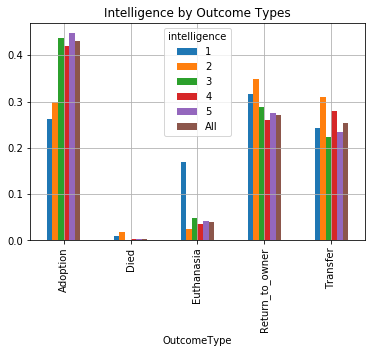

In [191]:
pd.crosstab(dogs_outcomes.OutcomeType, dogs_outcomes.intelligence, normalize='columns', margins=True). \
            plot(kind='bar', title='Intelligence by Outcome Types', grid=True, figsize=(6,4))

In [192]:
# Insights regarding Dogs' intelligence:
# - As a dog with low level of intelligence, your chances to be Adopted are significantly falling, while your chances of being 
#   Euthanaised are significantly rising

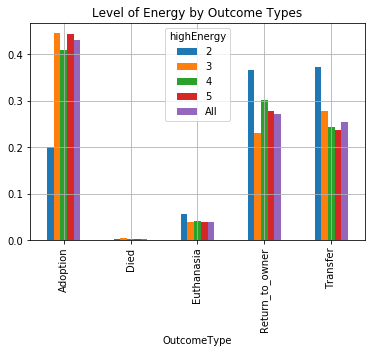

In [193]:
pd.crosstab(dogs_outcomes.OutcomeType, dogs_outcomes.highEnergy, normalize='columns', margins=True). \
            plot(kind='bar', title='Level of Energy by Outcome Types', grid=True, figsize=(6,4))

In [194]:
# Insights regarding Dogs' level of Energy:
# - As a low-energy dog, your chances of being Adopted are significantly falling, while your chances of being 
#   Euthanaised/RTO/Transferred are rising

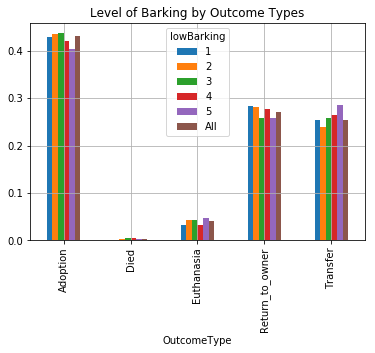

In [195]:
pd.crosstab(dogs_outcomes.OutcomeType, dogs_outcomes.lowBarking, normalize='columns', margins=True). \
            plot(kind='bar', title='Level of Barking by Outcome Types', grid=True, figsize=(6,4))

In [196]:
# No specific insights regarding Dogs' level of Barking.

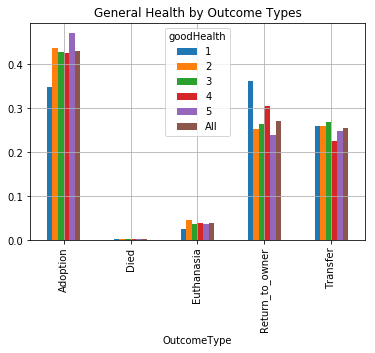

In [197]:
pd.crosstab(dogs_outcomes.OutcomeType, dogs_outcomes.goodHealth, normalize='columns', margins=True). \
            plot(kind='bar', title='General Health by Outcome Types', grid=True, figsize=(6,4))

In [198]:
# Insights regarding Dogs' level of Health:
# - As a dog with very low level of general health, your chances of being Adopted are falling, while your chances of being 
#   RTO are rising
# - As a dog with the highest level of general health, your chances of being Adopted are rising

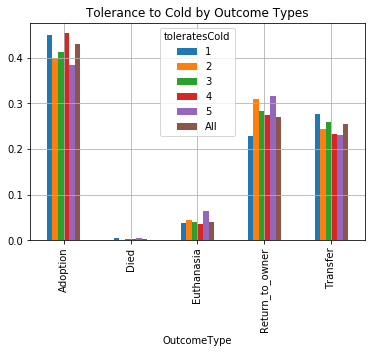

In [199]:
pd.crosstab(dogs_outcomes.OutcomeType, dogs_outcomes.toleratesCold, normalize='columns', margins=True). \
            plot(kind='bar', title='Tolerance to Cold by Outcome Types', grid=True, figsize=(6,4))

In [200]:
# No specific insights regarding Dogs' Tolerance to Cold

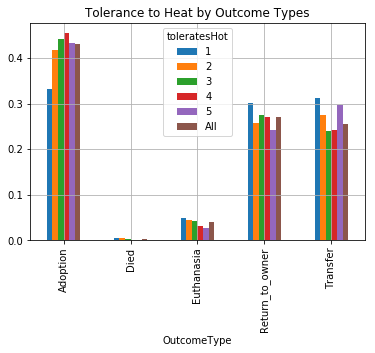

In [201]:
pd.crosstab(dogs_outcomes.OutcomeType, dogs_outcomes.toleratesHot, normalize='columns', margins=True). \
            plot(kind='bar', title='Tolerance to Heat by Outcome Types', grid=True, figsize=(6,4))

In [202]:
# Insights regarding Dogs' Tolerance to Heat:
# - As a dog with very low tolerance to heat, your chances of being Adopted are significantly falling. Your chances of being 
#   Transferred are rising
#
# It's hot in Texas! :)

In [203]:
# 3.7 Color:
# ==========

# First - some exploration of this feature

In [204]:
outcomes.Color.nunique()

366

In [205]:
dogs_outcomes = outcomes[outcomes.AnimalType == 'Dog']
cats_outcomes = outcomes[outcomes.AnimalType == 'Cat']

In [206]:
# Dogs
# ====

In [207]:
dogs_outcomes.Color.nunique()

262

In [208]:
dogs_color_popularity = dogs_outcomes['Color'].value_counts()
dogs_color_popularity

Black/White                1730
Brown/White                 882
Black                       851
White                       806
Tan/White                   773
Tricolor                    751
Black/Tan                   672
Brown                       637
Tan                         627
White/Brown                 562
White/Black                 475
Brown Brindle/White         450
Black/Brown                 435
Blue/White                  414
White/Tan                   389
Red                         337
Brown/Black                 332
Red/White                   331
Brown Brindle               232
Chocolate/White             221
Sable                       198
Buff                        195
Yellow                      185
Tan/Black                   183
Cream                       136
Chocolate                   127
White/Brown Brindle         115
Fawn/White                  109
Sable/White                  86
Gray/White                   82
                           ... 
Black/Or

In [209]:
# number of colors that constitute 80% of all dogs' samples
dogs_number_of_popular_colors = dogs_color_popularity.cumsum().searchsorted(0.8*animal_types.loc['Dog'])[0]
dogs_number_of_popular_colors

22

In [210]:
# Cats
# ====

In [211]:
cats_outcomes.Color.nunique()

146

In [212]:
cats_color_popularity = cats_outcomes['Color'].value_counts()
cats_color_popularity

Brown Tabby                1635
Black                      1441
Black/White                1094
Brown Tabby/White           940
Orange Tabby                841
Tortie                      530
Calico                      517
Orange Tabby/White          455
Blue Tabby                  433
Blue                        385
Torbie                      335
Blue/White                  288
Blue Tabby/White            241
Cream Tabby                 198
Lynx Point                  168
White/Black                 168
Seal Point                  136
White                       125
White/Brown Tabby            97
Flame Point                  85
Cream Tabby/White            79
White/Blue                   76
Torbie/White                 60
White/Orange Tabby           52
Black Smoke                  45
Black Tabby                  42
Lilac Point                  39
Gray Tabby                   35
Tortie/White                 33
Tortie Point                 32
                           ... 
Brown Ta

In [213]:
# number of colors that constitute 80% of all cats' samples
cats_number_of_popular_colors = cats_color_popularity.cumsum().searchsorted(0.8*animal_types.loc['Cat'])[0]
cats_number_of_popular_colors

12

In [214]:
# As shown above, there are 366 unique values in the Color column. Some of these values include a "coat pattern" (especially
# with cats), some of them consist of two colors (separated by '/') and some consist of one color.
# I'll try to deal with this feature and its correlation with the pets' OutcomeTypes, in 2 different ways:
#   a. Creating a new 'ColorCoat' column, whose values would relate to the "coat pattern" of the Color feature
#   b. Creating a new 'ColorGroup' column, whose values would reflect the colors' "families"
# Note: Not like in the case of "Breed" feature, narrowing the variety of colors by adding a new 'MainColor' column, might not
#       serve us well, because there's a big difference between, for instance, 'Black/White' and 'Black'. For that reason, 
#       I will not add such a column

In [215]:
# 3.7.a Creating a new 'ColorCoat' column, as follows:

coats = ['Augoti', 'Brindle', 'Calico', 'Merle', 'Point', 'Smoke', 'Tabby', 'Tick', 'Tiger', 'Torbie', 'Tortie', 'Tricolor']

In [216]:
def set_color_coat(color):
    """
    Returns a "color coat" of a given color. 
    If no coat was found, return 'Bicolor' if given color consists of two colors (separated by '/'), else return 'Solid' 
    """
    if color == 'Black/White':     # Black/White is not really a "coat", 
        return color               #                    however it is very popular and I want to define it specifically
    try:
        first_color, second_color = color.split('/')
        for coat in coats:                # look for coat in prime color
            if coat in first_color:
                return coat
        for coat in coats:                # look for coat in secondary color
            if coat in second_color:
                return coat
        return 'Bicolor'
    except:
        for coat in coats:                # look for coat in color
            if coat in color:
                return coat
        return 'Solid'

outcomes['ColorCoat'] = outcomes['Color'].apply(set_color_coat)

In [217]:
outcomes.head()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Named,...,goodHealth,highEnergy,intelligence,kidFriendly,lowBarking,lowShedding,dogSize,toleratesCold,toleratesHot,ColorCoat
AnimalID,,,,,,,,,,,,,,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,1,...,4,4,5,5,5,1,1,4,3,Bicolor
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1,...,999,999,999,999,999,999,999,999,999,Tabby
A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,1,...,888,888,888,888,888,888,888,888,888,Bicolor
A683430,Unknown,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,0,...,999,999,999,999,999,999,999,999,999,Solid
A667013,Unknown,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,0,...,3,4,4,4,2,3,1,3,2,Solid


In [218]:
outcomes['ColorCoat'].value_counts()

Bicolor        7727
Solid          6432
Tabby          5182
Black/White    2824
Brindle        1018
Tricolor        908
Tortie          582
Calico          580
Point           560
Torbie          398
Merle           318
Tick            109
Smoke            74
Tiger            17
Name: ColorCoat, dtype: int64

In [219]:
pd.crosstab(outcomes.ColorCoat, outcomes.OutcomeType, margins=True)

OutcomeType,Adoption,Died,Euthanasia,Return_to_owner,Transfer,All
ColorCoat,,,,,,
Bicolor,3197,25,454,2003,2048,7727
Black/White,1183,27,160,474,980,2824
Brindle,420,7,82,263,246,1018
Calico,232,4,34,21,289,580
Merle,151,0,14,82,71,318
Point,248,8,41,33,230,560
Smoke,46,2,1,2,23,74
Solid,2392,44,364,1387,2245,6432
Tabby,2024,74,323,211,2550,5182


In [220]:
# Separating between Dogs and Cats

In [221]:
# DOGS
# ----

dogs_outcomes = outcomes[outcomes.AnimalType == 'Dog']

In [222]:
pd.crosstab(dogs_outcomes.ColorCoat, dogs_outcomes.OutcomeType, margins=True)

OutcomeType,Adoption,Died,Euthanasia,Return_to_owner,Transfer,All
ColorCoat,,,,,,
Bicolor,2985,21,406,1966,1711,7089
Black/White,793,8,81,416,432,1730
Brindle,420,7,82,263,246,1018
Merle,151,0,14,82,71,318
Smoke,4,0,0,2,1,7
Solid,1678,14,228,1293,1191,4404
Tabby,0,0,0,1,0,1
Tick,60,0,4,18,27,109
Tiger,7,0,1,2,3,13


In [223]:
dogs_outcome_coat_crosstab = pd.crosstab(dogs_outcomes.ColorCoat, dogs_outcomes.OutcomeType, margins=True, normalize='index')
dogs_outcome_coat_crosstab

OutcomeType,Adoption,Died,Euthanasia,Return_to_owner,Transfer
ColorCoat,,,,,
Bicolor,0.421075,0.002962,0.057272,0.277331,0.241360
Black/White,0.458382,0.004624,0.046821,0.240462,0.249711
Brindle,0.412574,0.006876,0.080550,0.258350,0.241650
Merle,0.474843,0.000000,0.044025,0.257862,0.223270
Smoke,0.571429,0.000000,0.000000,0.285714,0.142857
Solid,0.381017,0.003179,0.051771,0.293597,0.270436
Tabby,0.000000,0.000000,0.000000,1.000000,0.000000
Tick,0.550459,0.000000,0.036697,0.165138,0.247706
Tiger,0.538462,0.000000,0.076923,0.153846,0.230769


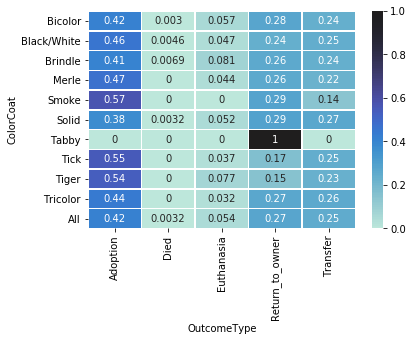

In [224]:
sns.heatmap(dogs_outcome_coat_crosstab, linewidths=0.5, annot=True, center=1)

In [225]:
# Insights regarding Dogs color coats (ignoring the very few samples of Tabby/Smoke/Tiger dogs):
# - As a Brindle dog, your chances to Die or to be Euthanaised are significantly rising
# - As a dog with a Tick coat, your chance of being Adopted are rising. Your chances to be Euthanaised are falling
# - As a Tricolor dog, your chances to be Euthanaised are falling

In [226]:
# CATS
# ----

cats_outcomes = outcomes[outcomes.AnimalType == 'Cat']

In [227]:
pd.crosstab(cats_outcomes.ColorCoat, cats_outcomes.OutcomeType, margins=True)

OutcomeType,Adoption,Died,Euthanasia,Return_to_owner,Transfer,All
ColorCoat,,,,,,
Bicolor,212,4,48,37,337,638
Black/White,390,19,79,58,548,1094
Calico,232,4,34,21,289,580
Point,248,8,41,33,230,560
Smoke,42,2,1,0,22,67
Solid,714,30,136,94,1054,2028
Tabby,2024,74,323,210,2550,5181
Tiger,1,0,2,0,1,4
Torbie,161,3,16,20,198,398


In [228]:
cats_outcome_coat_crosstab = pd.crosstab(cats_outcomes.ColorCoat, cats_outcomes.OutcomeType, margins=True, normalize='index')
cats_outcome_coat_crosstab

OutcomeType,Adoption,Died,Euthanasia,Return_to_owner,Transfer
ColorCoat,,,,,
Bicolor,0.332288,0.006270,0.075235,0.057994,0.528213
Black/White,0.356490,0.017367,0.072212,0.053016,0.500914
Calico,0.400000,0.006897,0.058621,0.036207,0.498276
Point,0.442857,0.014286,0.073214,0.058929,0.410714
Smoke,0.626866,0.029851,0.014925,0.000000,0.328358
Solid,0.352071,0.014793,0.067061,0.046351,0.519724
Tabby,0.390658,0.014283,0.062343,0.040533,0.492183
Tiger,0.250000,0.000000,0.500000,0.000000,0.250000
Torbie,0.404523,0.007538,0.040201,0.050251,0.497487


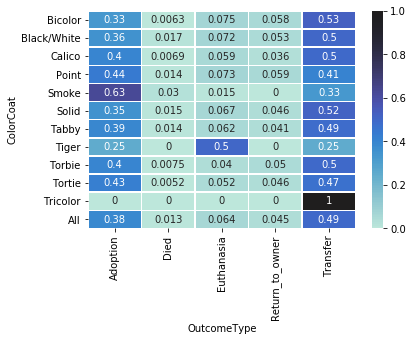

In [229]:
sns.heatmap(cats_outcome_coat_crosstab, linewidths=0.5, annot=True, center=1)

In [230]:
# Insights regarding Cats color coats (ignoring the very few samples of Tricolor/Smoke/Tiger dogs):
# - As a Calico/Bicolor cat, your chances to Die are falling
# - As a Tortie/Torbie cat, your chances to Die or to be Euthanaised are falling

In [231]:
# 3.7.b Creating a new 'ColorGroup' column, whose values would reflect the colors' "families", as follows:

color_groups_dict = {
    'Black'   : ['Black'],
    'White'   : ['White'],
    'Brown'   : ['Brown', 'Chocolate', 'Liver', 'Agouti', 'Tortie', 'Torbie', 'Seal'],
    'Red'     : ['Red', 'Orange', 'Ruddy', 'Sable', 'Pink'],
    'Gray'    : ['Gray', 'Silver', 'Silver Lynx'],
    'Yellow'  : ['Yellow', 'Apricot', 'Tan', 'Gold', 'Fawn', 'Buff', 'Lynx', 'Flame'],
    'Cream'   : ['Cream'],
    'Blue'    : ['Blue', 'Lilac', 'Blue Cream'],
    'Tricolor': ['Tricolor', 'Calico']}

In [232]:
# To the above items, I'll now add 'Black/White' and 10 most popular "Bicolor" combinations (as created earlier)

for bicolor in list(outcomes.Color[outcomes.ColorCoat == 'Bicolor'].value_counts().head(10).index) + ['Black/White']:
    color_groups_dict[bicolor] = [bicolor]

In [234]:
def remove_coat(color):
    '''remove "coat" from color, if exists'''
    for coat in coats:                
        if coat in color:                                      # remove coat from color, unless color is a coat by itself
            color = color.replace(' ' + coat, '') if coat != color else color
    return color

def set_color_group(color):
    '''In: color, Out: color-group'''
    try:
        first_color, second_color = color.split('/')
        first_color = remove_coat(first_color)
        second_color = remove_coat(second_color)
        for group in color_groups_dict:
            if first_color + '/' + second_color == group:         # first, look for the exact Bi-color group
                return group
        for group in color_groups_dict:
            if first_color in color_groups_dict[group]:           # if not found, look for the prime color's group
                return group
    except:
        color = remove_coat(color)
        for group in color_groups_dict:
            if color in color_groups_dict[group]:
                return group
    return 'Other'

outcomes['ColorGroup'] = outcomes['Color'].apply(set_color_group)

In [236]:
outcomes['ColorGroup'].value_counts()

Brown          4317
Black/White    2933
Black          2553
Brown/White    2308
Red            2171
Yellow         2009
White          1511
Tricolor       1379
Blue           1189
Blue/White      999
White/Brown     787
Tan/White       773
Black/Tan       672
White/Black     657
Cream           498
Black/Brown     488
White/Tan       389
Gray            374
Red/White       369
Brown/Black     353
Name: ColorGroup, dtype: int64

In [237]:
pd.crosstab(outcomes.ColorGroup, outcomes.OutcomeType, margins=True)

OutcomeType,Adoption,Died,Euthanasia,Return_to_owner,Transfer,All
ColorGroup,,,,,,
Black,949,21,157,367,1059,2553
Black/Brown,214,2,23,142,107,488
Black/Tan,284,2,30,192,164,672
Black/White,1232,28,167,496,1010,2933
Blue,477,13,64,110,525,1189
Blue/White,402,6,82,171,338,999
Brown,1707,37,254,544,1775,4317
Brown/Black,157,2,31,87,76,353
Brown/White,937,21,144,398,808,2308


In [238]:
# Separating between Dogs and Cats

In [239]:
# DOGS
# ----

dogs_outcomes = outcomes[outcomes.AnimalType == 'Dog']

In [240]:
pd.crosstab(dogs_outcomes.ColorGroup, dogs_outcomes.OutcomeType, margins=True)

OutcomeType,Adoption,Died,Euthanasia,Return_to_owner,Transfer,All
ColorGroup,,,,,,
Black,394,1,61,305,251,1012
Black/Brown,214,2,23,142,105,486
Black/Tan,284,2,30,192,164,672
Black/White,826,9,85,438,451,1809
Blue,125,0,16,68,67,276
Blue/White,179,0,47,151,91,468
Brown,580,8,93,422,359,1462
Brown/Black,155,2,28,85,72,342
Brown/White,571,3,88,361,343,1366


In [241]:
dogs_outcome_group_crosstab = pd.crosstab(dogs_outcomes.ColorGroup, dogs_outcomes.OutcomeType, margins=True, normalize='index')
dogs_outcome_group_crosstab

OutcomeType,Adoption,Died,Euthanasia,Return_to_owner,Transfer
ColorGroup,,,,,
Black,0.389328,0.000988,0.060277,0.301383,0.248024
Black/Brown,0.440329,0.004115,0.047325,0.292181,0.216049
Black/Tan,0.422619,0.002976,0.044643,0.285714,0.244048
Black/White,0.456606,0.004975,0.046987,0.242123,0.249309
Blue,0.452899,0.000000,0.057971,0.246377,0.242754
Blue/White,0.382479,0.000000,0.100427,0.322650,0.194444
Brown,0.396717,0.005472,0.063611,0.288646,0.245554
Brown/Black,0.453216,0.005848,0.081871,0.248538,0.210526
Brown/White,0.418009,0.002196,0.064422,0.264275,0.251098


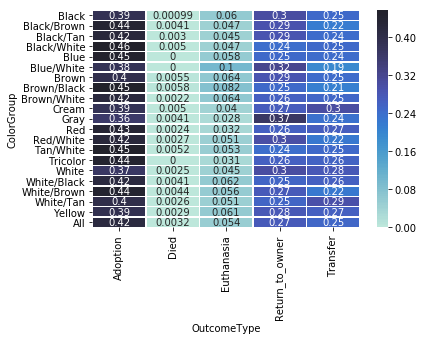

In [242]:
sns.heatmap(dogs_outcome_group_crosstab, linewidths=0.5, annot=True, center=0.5)

In [243]:
# Insights regarding Dogs color groups:
# - As a Gray dog, your chances to be Adopted or Euthanaised are falling, while your chances to Die or to be RTO are rising
# - As a Blue/White dog, your chances to be Euthanaised are significantly rising

In [244]:
# CATS
# ----

cats_outcomes = outcomes[outcomes.AnimalType == 'Cat']

In [245]:
pd.crosstab(cats_outcomes.ColorGroup, cats_outcomes.OutcomeType, margins=True)

OutcomeType,Adoption,Died,Euthanasia,Return_to_owner,Transfer,All
ColorGroup,,,,,,
Black,555,20,96,62,808,1541
Black/Brown,0,0,0,0,2,2
Black/White,406,19,82,58,559,1124
Blue,352,13,48,42,458,913
Blue/White,223,6,35,20,247,531
Brown,1127,29,161,122,1416,2855
Brown/Black,2,0,3,2,4,11
Brown/White,366,18,56,37,465,942
Cream,125,7,16,11,139,298


In [246]:
cats_outcome_group_crosstab = pd.crosstab(cats_outcomes.ColorGroup, cats_outcomes.OutcomeType, margins=True, normalize='index')
cats_outcome_group_crosstab

OutcomeType,Adoption,Died,Euthanasia,Return_to_owner,Transfer
ColorGroup,,,,,
Black,0.360156,0.012979,0.062297,0.040234,0.524335
Black/Brown,0.000000,0.000000,0.000000,0.000000,1.000000
Black/White,0.361210,0.016904,0.072954,0.051601,0.497331
Blue,0.385542,0.014239,0.052574,0.046002,0.501643
Blue/White,0.419962,0.011299,0.065913,0.037665,0.465160
Brown,0.394746,0.010158,0.056392,0.042732,0.495972
Brown/Black,0.181818,0.000000,0.272727,0.181818,0.363636
Brown/White,0.388535,0.019108,0.059448,0.039278,0.493631
Cream,0.419463,0.023490,0.053691,0.036913,0.466443


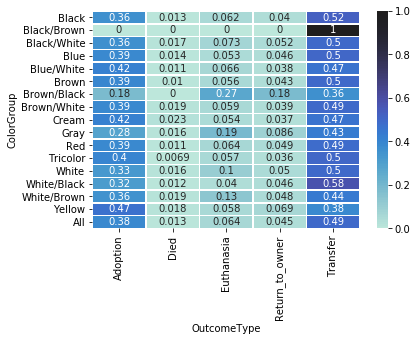

In [247]:
sns.heatmap(cats_outcome_group_crosstab, linewidths=0.5, annot=True, center=1)

In [248]:
# Insights regarding Cats color coats (ignoring the very few samples of Black/Brown and Brown/Black cats):
# - As a Gray cat, your chances to be Euthanaised are significantly rising
# - As a Yellow cat, your chances of being Adopted are rising. Your chances to be Transferred are rising

In [249]:
# 4. Summary:

In [1]:
# 4.a Summary of the features added to the given data structure

In [ ]:
# Named: 1 if the pet has a name, 0 if not
# UnNamed: 0 if the pet has a name, 1 if not
# DayOfWeek: DOW (Sun-Sat) of outcome
# Quarter: Quarter (1-4) of outcome
# Holiday: A holiday (if any) that occurs 0-5 days after an outcome
# Sex: The pet's gender (Male/Female)
# NeuterStatus: Intact / N/S (Neutered/Spayed) / Unknown
# LifeStage: Based on the pet's age: neonatal (birth-4 weeks), puppy/kitten (1-6 months), junior (7 months-2 years),
#            prime (3-6 years), mature (7-10 years), senior (11-14 years), geriatric (15+ years)
# BreedPurity: Based on the pet's breed: Mix/Crossbreeds/Purebred 
# MainBreed: The "prime" breed of the pet
# DogFamily: Relevant for dogs only. Based on the dog's breed - Working/Hound/Herding/Terrier/Sporting/Toy/Companion/Pit Bull
# dogFriendly: Relevant for dogs only. Based on the dog's breed. From 1 to 5    
# easyToGroom: Relevant for dogs only. Based on the dog's breed. From 1 to 5
# easyToTrain: Relevant for dogs only. Based on the dog's breed. From 1 to 5  
# goodHealth: Relevant for dogs only. Based on the dog's breed. From 1 to 5
# highEnergy: Relevant for dogs only. Based on the dog's breed. From 1 to 5
# intelligence: Relevant for dogs only. Based on the dog's breed. From 1 to 5
# kidFriendly: Relevant for dogs only. Based on the dog's breed. From 1 to 5
# lowBarking: Relevant for dogs only. Based on the dog's breed. From 1 to 5
# lowShedding: Relevant for dogs only. Based on the dog's breed. From 1 to 5
# dogSize: Relevant for dogs only. Based on the dog's breed. From 1 to 5
# toleratesCold: Relevant for dogs only. Based on the dog's breed. From 1 to 5
# toleratesHot: Relevant for dogs only. Based on the dog's breed. From 1 to 5
# ColorCoat: Based on the pet's color: Augoti/Brindle/Calico/Merle/Point/Smoke/Tabby/Tick/Tiger/Torbie/Tortie/Tricolor
# ColorGroup: Based on the pet's color: Black/White/Brown/Red/Gray/Yellow/Cream/Blue/Tricolor and 11 most popular "Bicolor"s

In [ ]:
# 4.b Summary of insights based on given and collected data:

# According to the description of the case in the Kaggle web page, the outcome of more than 35% of pets arriving to shelters
# in the US every year is death (2.7 milion out of 7.6 million). However, strangely enough, according to the dataset of intake
# information received from the AAC (Austin Animal Center), the percent of dead and euthanized dogs and cats (along 2.5 years)
# is only 6.5% (5.8% Euthanasia + 0.7% Died ,752 out of 26,729 ).
# Trying to explain the above finding, I'd like to suggest that the "final outcome" of many transferred pets might be
# "not as good as expected".

# - Almost 85% of adopted animals, are named
# - Almost 97% of animals which are Returned To their Owners (RTO), are named
# - Almost 70% of died animals, are un-named
# - un-named animals tend to be euthanised and transferred more than named animals
# - 47% of named animals are adopted, weheras the rate of total adoptions is only 40%
# - 24% of named animals are RTO, weheras the rate of total RTO is only 18%
# - Likewize, the percentages of named animals which are Died/Euthanaised/Transferred are lower than total percentages

# - Not surprisingly, it seems that most adoptions take place during the weekends. Also, it seems that animals are euthanaised
#   mostly on Mondays, supposedly after they had not been adopted during the passed weekend.
# - As I mentioned above, this feature will not contribute for predicting the next outcome, however it might suggests that the
#   shelter may put some extra effort during weekends, as people tend to adopt the animals on Sat and Sun.

# It seems that more activites take place during Q4, and less during Q1.

# About 20% of all adoptions take place 5 days or less before a holiday (mostly before Christmas)

# - It seems that if an animal is suffering, aggressive, bad-behaving, in Rabies Risk or has a medical problem - it will be
#   euthanaized.
# - Main subtypes of Transfer are: 'Partner' and 'SCRP':
#     - Partner: is probably another shelter for pets
#     - SCRP: just by searching the web, I couldn't find what was the meaning of this abbreviation. However, by exploring
#             the data furthermore, I assume that it means: "Street Cats Rescue Program". Here's why:
#             i. SCRP is relevant only for cats (as shown below)
#             ii. Almost all SCRP rows are relevant for pets with no name (as shown below) ==> i.e. street cats

# Amazingly, NONE of the animals that their SexuponOutcome is "Unknown" were adopted! Only few of them were RTO.

# - 97% of adopted pets were spayed/neutered
# - 83% of RTO pets were spayed/neutered
# - 69% of Died pets and 56% of Euthanaised pets were Intact

# - 77% (56 + 21) of N/S pets ended well (either adopted or returned to their owners)
# - 69% of Intact pets were transferred
# - 87% of pets whose neutered/spayed status was not clear, were transferred. None of them were adopted

# It seems that adoption is not related to the sex of the pet
# Males Die and Euthanaised more than females
# Males RTO more than females

# Most of the '0 years' pets are cats. Most of them were transferred (none of them were adopted).

# - Adoption:
#     - Pets are not adopted until they're at least 1 month old. 
#     - Pets are almost not adopted at the Mature stage or older
#     - Pets are mostly adopted when they're at the Puppy/Kitten stage. After that - as Juniors
# - RTO:
#     - Pets are returned to their owners mostly as Junior or Prime
# - Die:
#     - Pets mostly Die in the Neonatal and Puppy/Kitten stages. 
# - Euthanasia:
#     - Pets mostly Eunathaised in the Junior and Prime stages

# - Neonatal:
#     - Pets are not adopted during their Neonatal period (as seen earlier) 
#     - Being in the Neonatal life stage, there's almost 93% chance to be trasferred
#     - Chances to Die are high
# - Puppy/Kitten:
#     - As a Puppy/Kitten, there's 61% chance to be Adopted
#     - Chances to Die are also high
# - Junior:
#     - As a Junior, there's almost 40% chance to be Adopted; 34% chance to be transferred
# - Mature:
#     - As a Mature pet, there's 38% chance to be RTO
# - Senior:
#     - As a Senior, there's 45% chance to be RTO
# - Geriatric:
#     - As a Geriatric pet, there's 52% chance to be RTO, 24% to be Euthanaised and only 11% chance to be adopted

# - While Junior dogs' chances to be Adopted are rising, Junior cats' chances are falling
# - Senior dogs' chances to be Adopted are much lower than Senior cats'
# - Senior and Geriatric cats' chances to be Euthaaised are higher than Senior and Geriatric dogs'
# - Junior cats' chances to be Transferred are higher than Junior dogs'

# - As a Crossbreeds dog, your chances of being Adopted are rising, and your chances of being RTO are falling
# - As a Purebed dog, your chances of being Adopted are falling, and your chances of being RTO are rising (which is not
#   surprising, as it might be an expensive or rare dog, whom the owner would try hard to find)    

# - As a Crossbreeds cat, your chances of being Adopted are rising, and your chances of being RTO are falling
# - As a Purebed cat, your chances of being Adopted are falling, and your chances of being RTO are rising (same as dogs). Your
#   chances of being Transferred are a bit rising
# Note: Percentage of 'Mix' cats is very high (97.5%), so the contribution of this feature to the Model is doubtful

# - As a Herding/Hound/Terrier/Sporting/Toy dog, your chances of being Adopted are rising
# - As a Companion/Pit Bull dog, your chances of being Adopted are significantly falling
# - As a Pit Bull, your chances of being Euthanaised are significantly rising
# - As a Hound dog, your chances of being Euthanaised are significantly falling
# - As a Toy/Companion dog, your chances to Die are rising
# - As a Companion/Working/Pit Bull dog, your chances of being RTO are rising. These chances are falling for Herding/Hound dogs

# - As a very big dog (size=5), your chances to Die or to be Transferred are rising. Your chances of being Adopted are falling
# - As a  dog of size = 2, your chances of being RTO are significantly rising. Your chances of being Adopted are falling
# - As a very small dog (size=1), your chances to be Transferred are rising. Your chances of being RTO are falling

# - As an unfriendly dog (to other dogs), your chances to Die or to be Euthanaised are significally rising. Your chances of
#   being Adopted are falling

# - As an unfriendly dog (to kids), your chances to Die or to be Euthanaised are significally rising. Your chances of
#   being Adopted are falling

# - As a dog with low levels of ease-of-grooming, your chances to be Adopted are falling, while your chances of being 
#   Euthanaised or Transferred are rising

# - As a dog with level of shedding = 2, your chances to be Adopted are falling, while your chances of being 
#   Euthanaised or RTO are rising (can't find an explanation for this insight...)

# - As a dog with level of easeToTrain = 3, your chances to be Adopted are falling, while your chances of being 
#   Transferred are rising (can't find an explanation for this insight...)

# - As a dog with low level of intelligence, your chances to be Adopted are significantly falling, while your chances of being 
#   Euthanaised are significantly rising

# - As a low-energy dog, your chances of being Adopted are significantly falling, while your chances of being 
#   Euthanaised/RTO/Transferred are rising

# No specific insights regarding Dogs' level of Barking.

# - As a dog with very low level of general health, your chances of being Adopted are falling, while your chances of being 
#   RTO are rising
# - As a dog with the highest level of general health, your chances of being Adopted are rising

# No specific insights regarding Dogs' Tolerance to Cold

# - As a dog with very low tolerance to heat, your chances of being Adopted are significantly falling. Your chances of being 
#   Transferred are rising

# - As a Brindle dog, your chances to Die or to be Euthanaised are significantly rising
# - As a dog with a Tick coat, your chance of being Adopted are rising. Your chances to be Euthanaised are falling
# - As a Tricolor dog, your chances to be Euthanaised are falling

# - As a Calico/Bicolor cat, your chances to Die are falling
# - As a Tortie/Torbie cat, your chances to Die or to be Euthanaised are falling

# - As a Gray dog, your chances to be Adopted or Euthanaised are falling, while your chances to Die or to be RTO are rising
# - As a Blue/White dog, your chances to be Euthanaised are significantly rising

# - As a Gray cat, your chances to be Euthanaised are significantly rising
# - As a Yellow cat, your chances of being Adopted are rising. Your chances to be Transferred are rising

In [ ]:
# 4.c Plans for the next part of the project:
#     - I'll prepare the Dataframe to be used by various models:
#         - feature selection: I'll try to select the appropriate features (and drop the others), in order to improve 
#           models' scores
#         - I'll transform some of the features into dummy variables, using DataFrame.get_dummies()
#         - Some of features I added, are related only for dogs. I'll have to deal with that (I prefer not to split the given
#           data into 2 separate dataframes (dogs/cats))
#     - As the given "test" dataset is not complete, I'll prepare the data for the Train/Test split
#     - I'll run several Models, with various hyper parameters, and compare between them while analysing the results